# AutoRec cs3639 Recommendation Systems course IDC

### here will be general explanations

In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
from torch import nn

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

# Matrix Factorization

In [3]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [4]:
from src.data_prep import movielens_load
train, test = movielens_load(1)
print(train.shape)
train

(80000, 4)


,user_id,item_id,rating,timestamp
0,0,0,5,874965758
1,0,1,3,876893171
2,0,2,4,878542960
3,0,3,3,876893119
4,0,4,3,889751712
...,...,...,...,...
79995,942,1066,2,875501756
79996,942,1073,4,888640250
79997,942,1187,3,888640250
79998,942,1227,3,888640275


STARTING TRAIN MF with k: 10, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 2.318, val: 1.612
EPOCH 2: Avg losses: train: 1.315, val: 0.977
EPOCH 3: Avg losses: train: 0.877, val: 0.758
EPOCH 4: Avg losses: train: 0.729, val: 0.702
EPOCH 5: Avg losses: train: 0.687, val: 0.684
EPOCH 6: Avg losses: train: 0.660, val: 0.651
EPOCH 7: Avg losses: train: 0.580, val: 0.551
EPOCH 8: Avg losses: train: 0.476, val: 0.483
EPOCH 9: Avg losses: train: 0.440, val: 0.469
EPOCH 10: Avg losses: train: 0.432, val: 0.462
EPOCH 11: Avg losses: train: 0.429, val: 0.462
EPOCH 12: Avg losses: train: 0.429, val: 0.462
EPOCH 13: Avg losses: train: 0.429, val: 0.461
EPOCH 14: Avg losses: train: 0.429, val: 0.460
EPOCH 15: Avg losses: train: 0.429, val: 0.460
EPOCH 16: Avg losses: train: 0.428, val: 0.461
EPOCH 17: Avg losses: train: 0.429, val: 0.460
EPOCH 18: Avg losses: train: 0.428, val: 0.460
EPOCH 19: Avg losses: train: 0.428, val: 0.461
EPOCH 20: Avg losses: train: 0.429, val: 0.462
EPOCH 21: Avg los

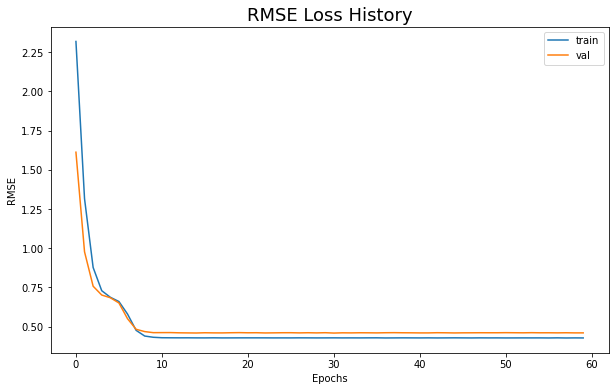

model train time: 87.458

STARTING TRAIN MF with k: 10, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 1.852, val: 1.062
EPOCH 2: Avg losses: train: 0.847, val: 0.720
EPOCH 3: Avg losses: train: 0.700, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

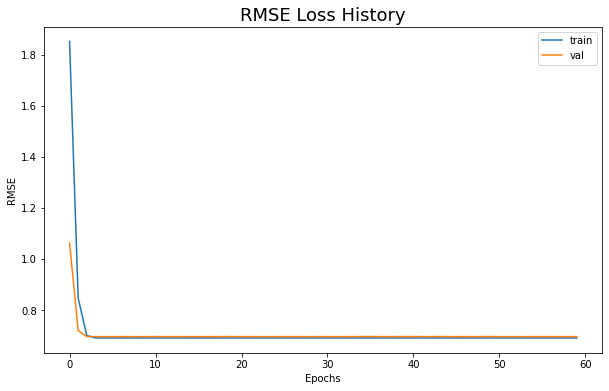

model train time: 84.542

STARTING TRAIN MF with k: 10, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 1.716, val: 0.930
EPOCH 2: Avg losses: train: 0.773, val: 0.703
EPOCH 3: Avg losses: train: 0.693, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

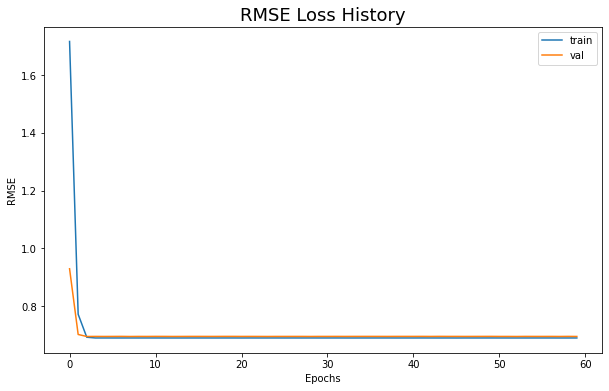

model train time: 84.008

STARTING TRAIN MF with k: 10, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.381, val: 0.760
EPOCH 2: Avg losses: train: 0.705, val: 0.686
EPOCH 3: Avg losses: train: 0.624, val: 0.556
EPOCH 4: Avg losses: train: 0.461, val: 0.471
EPOCH 5: Avg losses: train: 0.436, val: 0.464
EPOCH 6: Avg losses: train: 0.434, val: 0.466
EPOCH 7: Avg losses: train: 0.435, val: 0.467
EPOCH 8: Avg losses: train: 0.435, val: 0.465
EPOCH 9: Avg losses: train: 0.435, val: 0.469
EPOCH 10: Avg losses: train: 0.435, val: 0.463
EPOCH 11: Avg losses: train: 0.434, val: 0.466
EPOCH 12: Avg losses: train: 0.434, val: 0.467
EPOCH 13: Avg losses: train: 0.434, val: 0.465
EPOCH 14: Avg losses: train: 0.434, val: 0.463
EPOCH 15: Avg losses: train: 0.434, val: 0.462
EPOCH 16: Avg losses: train: 0.433, val: 0.466
EPOCH 17: Avg losses: train: 0.434, val: 0.463
EPOCH 18: Avg losses: train: 0.433, val: 0.462
EPOCH 19: Avg losses: train: 0.433, val: 0.465
EPOCH 20: Avg losses: train: 0.433, va

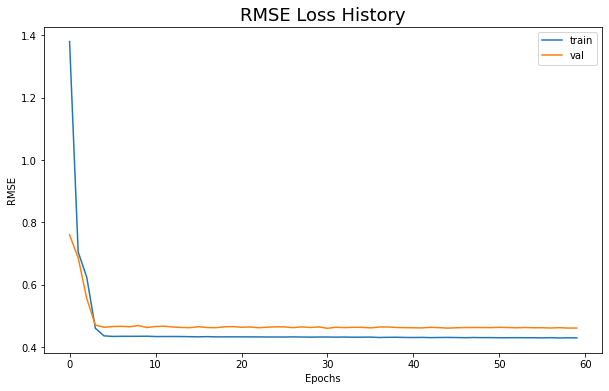

model train time: 84.128

STARTING TRAIN MF with k: 10, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.110, val: 0.697
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

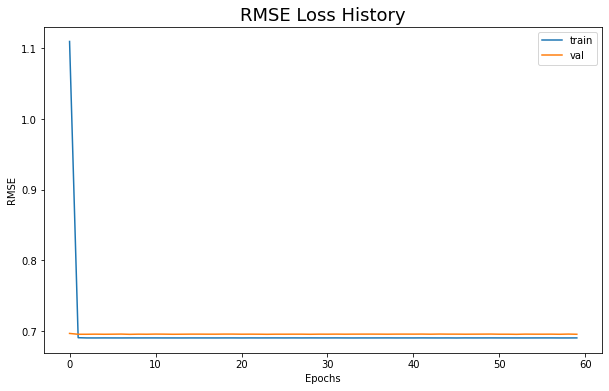

model train time: 84.529

STARTING TRAIN MF with k: 10, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.048, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

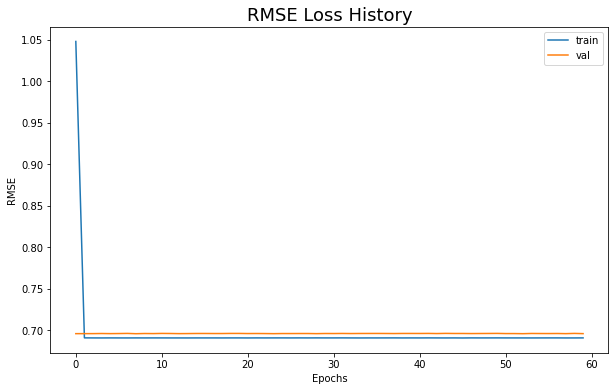

model train time: 84.629

STARTING TRAIN MF with k: 10, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.086, val: 0.695
EPOCH 2: Avg losses: train: 0.628, val: 0.534
EPOCH 3: Avg losses: train: 0.451, val: 0.471
EPOCH 4: Avg losses: train: 0.439, val: 0.473
EPOCH 5: Avg losses: train: 0.440, val: 0.467
EPOCH 6: Avg losses: train: 0.439, val: 0.470
EPOCH 7: Avg losses: train: 0.439, val: 0.471
EPOCH 8: Avg losses: train: 0.438, val: 0.468
EPOCH 9: Avg losses: train: 0.438, val: 0.472
EPOCH 10: Avg losses: train: 0.437, val: 0.465
EPOCH 11: Avg losses: train: 0.436, val: 0.468
EPOCH 12: Avg losses: train: 0.436, val: 0.469
EPOCH 13: Avg losses: train: 0.436, val: 0.466
EPOCH 14: Avg losses: train: 0.436, val: 0.464
EPOCH 15: Avg losses: train: 0.435, val: 0.463
EPOCH 16: Avg losses: train: 0.434, val: 0.467
EPOCH 17: Avg losses: train: 0.435, val: 0.464
EPOCH 18: Avg losses: train: 0.434, val: 0.463
EPOCH 19: Avg losses: train: 0.433, val: 0.466
EPOCH 20: Avg losses: train: 0.433, va

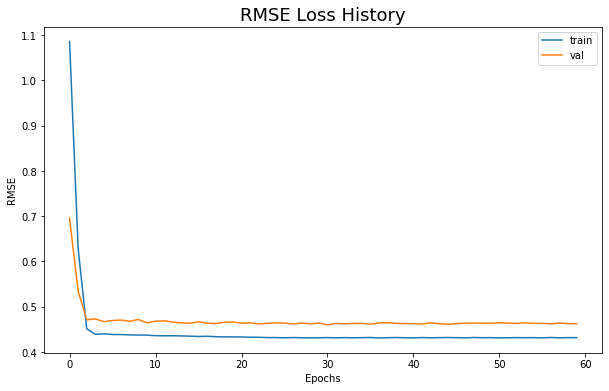

model train time: 85.071

STARTING TRAIN MF with k: 10, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 0.932, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

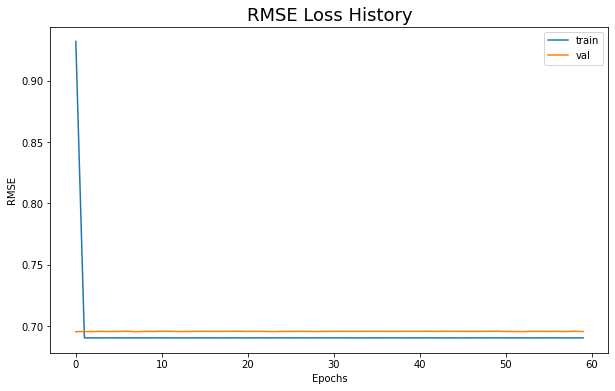

model train time: 86.570

STARTING TRAIN MF with k: 10, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 0.899, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

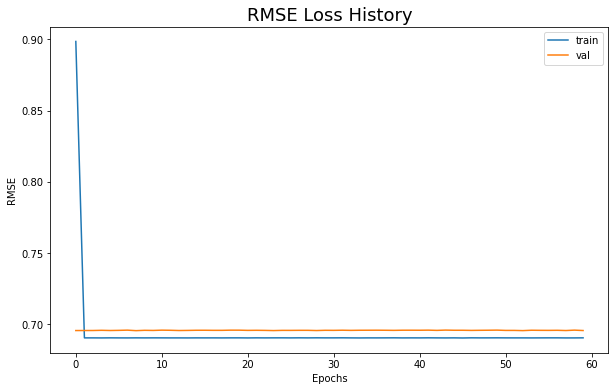

model train time: 93.216

STARTING TRAIN MF with k: 15, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 2.760, val: 1.915
EPOCH 2: Avg losses: train: 1.496, val: 1.078
EPOCH 3: Avg losses: train: 0.927, val: 0.778
EPOCH 4: Avg losses: train: 0.736, val: 0.703
EPOCH 5: Avg losses: train: 0.684, val: 0.682
EPOCH 6: Avg losses: train: 0.650, val: 0.638
EPOCH 7: Avg losses: train: 0.554, val: 0.525
EPOCH 8: Avg losses: train: 0.459, val: 0.473
EPOCH 9: Avg losses: train: 0.435, val: 0.466
EPOCH 10: Avg losses: train: 0.431, val: 0.461
EPOCH 11: Avg losses: train: 0.430, val: 0.462
EPOCH 12: Avg losses: train: 0.430, val: 0.463
EPOCH 13: Avg losses: train: 0.430, val: 0.461
EPOCH 14: Avg losses: train: 0.430, val: 0.460
EPOCH 15: Avg losses: train: 0.429, val: 0.460
EPOCH 16: Avg losses: train: 0.429, val: 0.462
EPOCH 17: Avg losses: train: 0.430, val: 0.461
EPOCH 18: Avg losses: train: 0.429, val: 0.460
EPOCH 19: Avg losses: train: 0.429, val: 0.462
EPOCH 20: Avg losses: train: 0.429, va

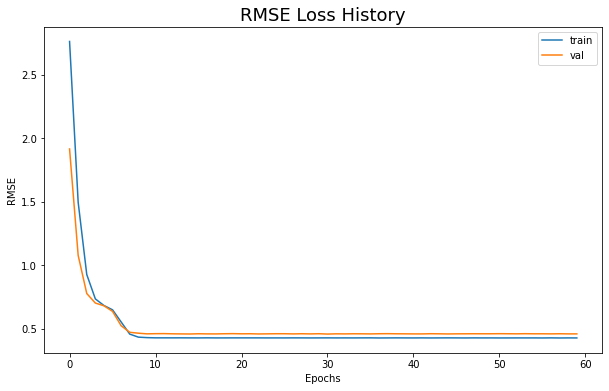

model train time: 97.416

STARTING TRAIN MF with k: 15, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 2.259, val: 1.213
EPOCH 2: Avg losses: train: 0.911, val: 0.728
EPOCH 3: Avg losses: train: 0.703, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

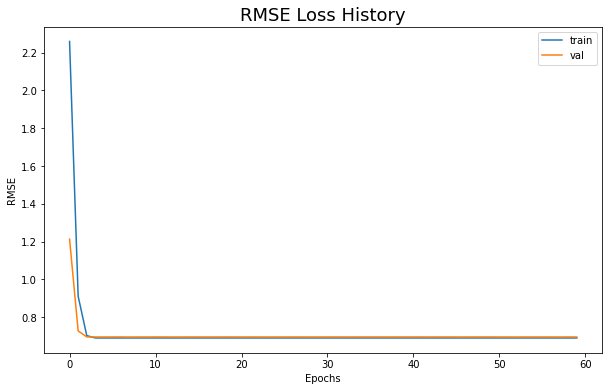

model train time: 98.923

STARTING TRAIN MF with k: 15, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 2.080, val: 1.033
EPOCH 2: Avg losses: train: 0.806, val: 0.706
EPOCH 3: Avg losses: train: 0.694, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

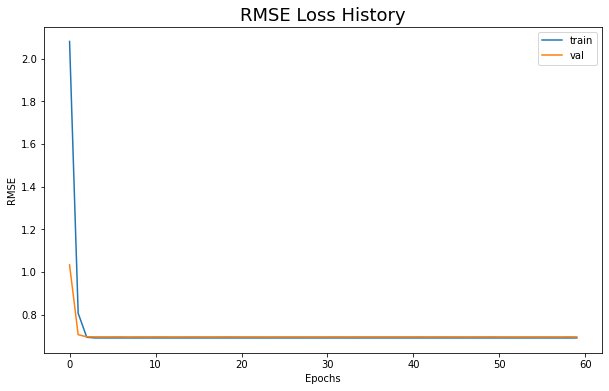

model train time: 97.826

STARTING TRAIN MF with k: 15, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.655, val: 0.789
EPOCH 2: Avg losses: train: 0.706, val: 0.675
EPOCH 3: Avg losses: train: 0.587, val: 0.516
EPOCH 4: Avg losses: train: 0.447, val: 0.470
EPOCH 5: Avg losses: train: 0.437, val: 0.465
EPOCH 6: Avg losses: train: 0.436, val: 0.468
EPOCH 7: Avg losses: train: 0.437, val: 0.469
EPOCH 8: Avg losses: train: 0.437, val: 0.467
EPOCH 9: Avg losses: train: 0.437, val: 0.471
EPOCH 10: Avg losses: train: 0.437, val: 0.464
EPOCH 11: Avg losses: train: 0.436, val: 0.468
EPOCH 12: Avg losses: train: 0.436, val: 0.469
EPOCH 13: Avg losses: train: 0.436, val: 0.466
EPOCH 14: Avg losses: train: 0.435, val: 0.464
EPOCH 15: Avg losses: train: 0.435, val: 0.463
EPOCH 16: Avg losses: train: 0.434, val: 0.467
EPOCH 17: Avg losses: train: 0.435, val: 0.464
EPOCH 18: Avg losses: train: 0.434, val: 0.463
EPOCH 19: Avg losses: train: 0.434, val: 0.466
EPOCH 20: Avg losses: train: 0.434, va

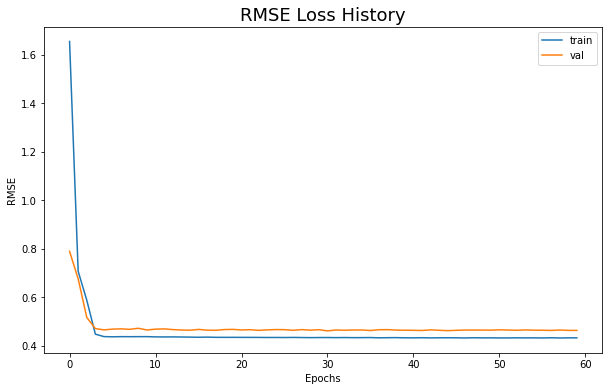

model train time: 102.327

STARTING TRAIN MF with k: 15, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.270, val: 0.697
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

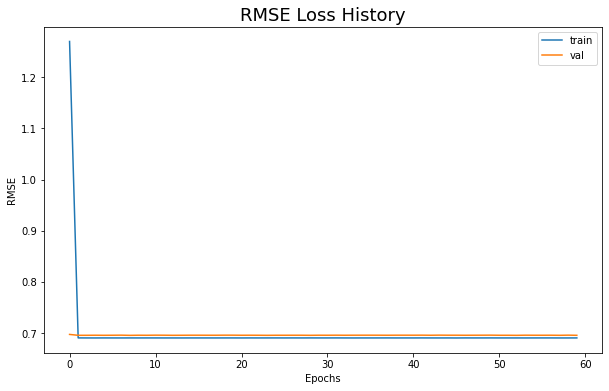

model train time: 95.026

STARTING TRAIN MF with k: 15, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.184, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

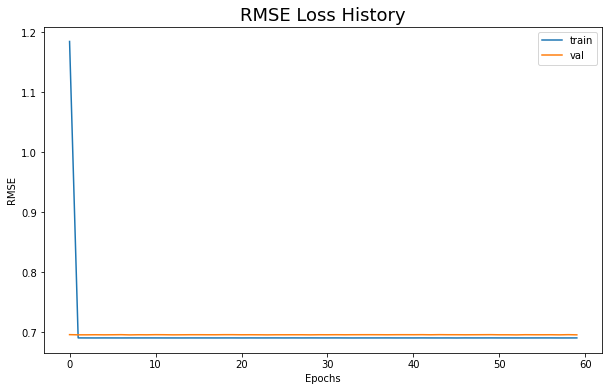

model train time: 93.109

STARTING TRAIN MF with k: 15, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.249, val: 0.692
EPOCH 2: Avg losses: train: 0.601, val: 0.506
EPOCH 3: Avg losses: train: 0.446, val: 0.473
EPOCH 4: Avg losses: train: 0.442, val: 0.476
EPOCH 5: Avg losses: train: 0.443, val: 0.470
EPOCH 6: Avg losses: train: 0.442, val: 0.473
EPOCH 7: Avg losses: train: 0.442, val: 0.474
EPOCH 8: Avg losses: train: 0.441, val: 0.471
EPOCH 9: Avg losses: train: 0.441, val: 0.475
EPOCH 10: Avg losses: train: 0.440, val: 0.467
EPOCH 11: Avg losses: train: 0.439, val: 0.471
EPOCH 12: Avg losses: train: 0.439, val: 0.472
EPOCH 13: Avg losses: train: 0.439, val: 0.469
EPOCH 14: Avg losses: train: 0.439, val: 0.467
EPOCH 15: Avg losses: train: 0.438, val: 0.466
EPOCH 16: Avg losses: train: 0.438, val: 0.470
EPOCH 17: Avg losses: train: 0.438, val: 0.466
EPOCH 18: Avg losses: train: 0.437, val: 0.465
EPOCH 19: Avg losses: train: 0.437, val: 0.469
EPOCH 20: Avg losses: train: 0.437, va

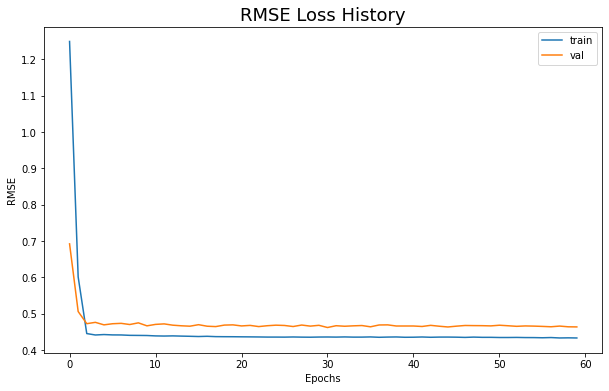

model train time: 94.733

STARTING TRAIN MF with k: 15, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.026, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

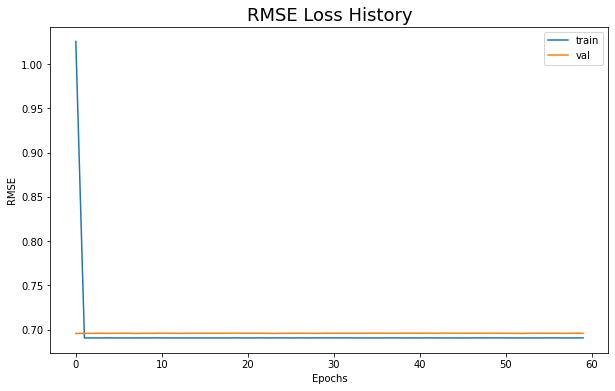

model train time: 95.515

STARTING TRAIN MF with k: 15, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 0.979, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, va

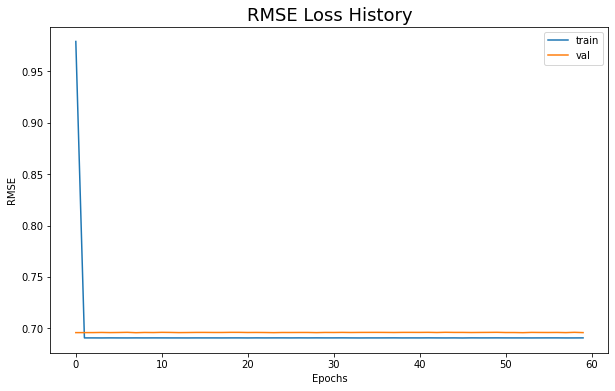

model train time: 93.257

STARTING TRAIN MF with k: 20, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 3.131, val: 2.145
EPOCH 2: Avg losses: train: 1.651, val: 1.161
EPOCH 3: Avg losses: train: 0.970, val: 0.798
EPOCH 4: Avg losses: train: 0.738, val: 0.706
EPOCH 5: Avg losses: train: 0.677, val: 0.676
EPOCH 6: Avg losses: train: 0.632, val: 0.615
EPOCH 7: Avg losses: train: 0.526, val: 0.505
EPOCH 8: Avg losses: train: 0.449, val: 0.469
EPOCH 9: Avg losses: train: 0.433, val: 0.466
EPOCH 10: Avg losses: train: 0.431, val: 0.461
EPOCH 11: Avg losses: train: 0.430, val: 0.463
EPOCH 12: Avg losses: train: 0.430, val: 0.463
EPOCH 13: Avg losses: train: 0.430, val: 0.462
EPOCH 14: Avg losses: train: 0.430, val: 0.461
EPOCH 15: Avg losses: train: 0.430, val: 0.460
EPOCH 16: Avg losses: train: 0.430, val: 0.462
EPOCH 17: Avg losses: train: 0.430, val: 0.461
EPOCH 18: Avg losses: train: 0.430, val: 0.461
EPOCH 19: Avg losses: train: 0.430, val: 0.462
EPOCH 20: Avg losses: train: 0.430, va

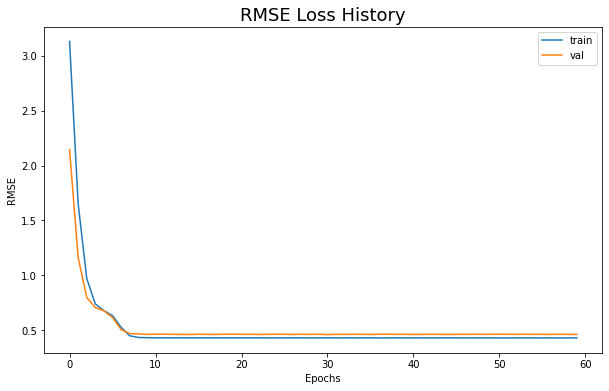

model train time: 108.639

STARTING TRAIN MF with k: 20, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 2.535, val: 1.311
EPOCH 2: Avg losses: train: 0.947, val: 0.734
EPOCH 3: Avg losses: train: 0.703, val: 0.696
EPOCH 4: Avg losses: train: 0.690, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

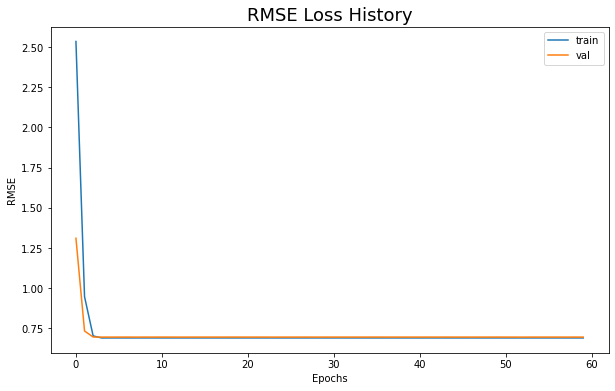

model train time: 106.879

STARTING TRAIN MF with k: 20, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 2.326, val: 1.101
EPOCH 2: Avg losses: train: 0.825, val: 0.708
EPOCH 3: Avg losses: train: 0.694, val: 0.696
EPOCH 4: Avg losses: train: 0.690, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

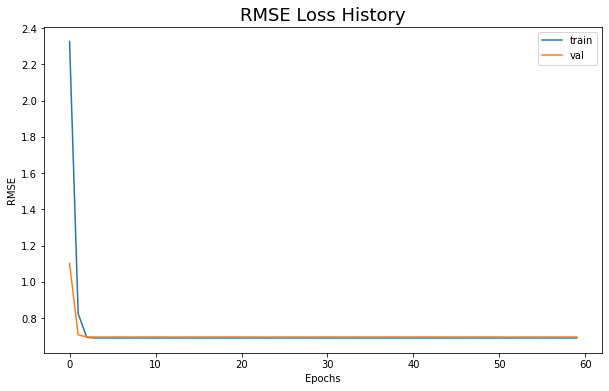

model train time: 110.390

STARTING TRAIN MF with k: 20, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.831, val: 0.807
EPOCH 2: Avg losses: train: 0.703, val: 0.666
EPOCH 3: Avg losses: train: 0.562, val: 0.499
EPOCH 4: Avg losses: train: 0.443, val: 0.470
EPOCH 5: Avg losses: train: 0.438, val: 0.466
EPOCH 6: Avg losses: train: 0.437, val: 0.469
EPOCH 7: Avg losses: train: 0.438, val: 0.470
EPOCH 8: Avg losses: train: 0.438, val: 0.468
EPOCH 9: Avg losses: train: 0.438, val: 0.472
EPOCH 10: Avg losses: train: 0.437, val: 0.465
EPOCH 11: Avg losses: train: 0.436, val: 0.468
EPOCH 12: Avg losses: train: 0.436, val: 0.469
EPOCH 13: Avg losses: train: 0.436, val: 0.466
EPOCH 14: Avg losses: train: 0.435, val: 0.464
EPOCH 15: Avg losses: train: 0.435, val: 0.463
EPOCH 16: Avg losses: train: 0.434, val: 0.466
EPOCH 17: Avg losses: train: 0.434, val: 0.463
EPOCH 18: Avg losses: train: 0.433, val: 0.463
EPOCH 19: Avg losses: train: 0.433, val: 0.466
EPOCH 20: Avg losses: train: 0.433, v

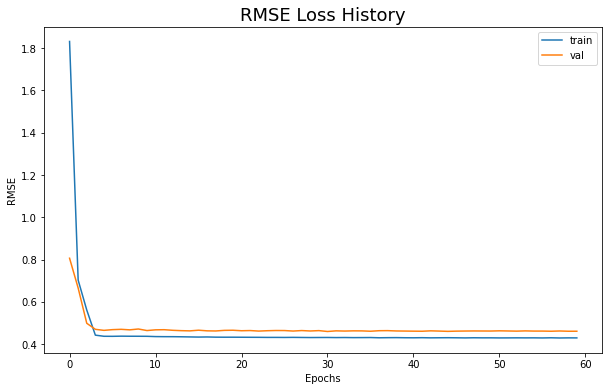

model train time: 112.639

STARTING TRAIN MF with k: 20, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.372, val: 0.698
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

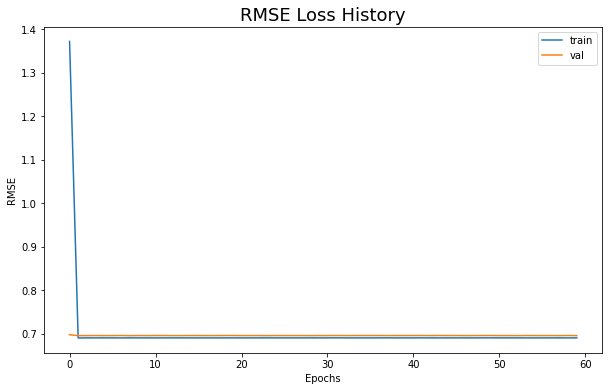

model train time: 114.690

STARTING TRAIN MF with k: 20, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.274, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

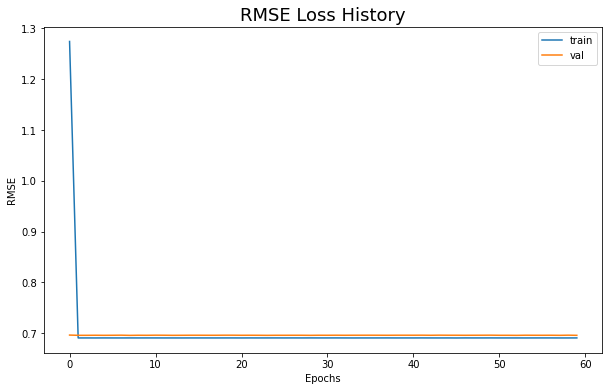

model train time: 116.723

STARTING TRAIN MF with k: 20, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.351, val: 0.687
EPOCH 2: Avg losses: train: 0.574, val: 0.491
EPOCH 3: Avg losses: train: 0.443, val: 0.473
EPOCH 4: Avg losses: train: 0.443, val: 0.478
EPOCH 5: Avg losses: train: 0.444, val: 0.471
EPOCH 6: Avg losses: train: 0.443, val: 0.473
EPOCH 7: Avg losses: train: 0.442, val: 0.473
EPOCH 8: Avg losses: train: 0.440, val: 0.470
EPOCH 9: Avg losses: train: 0.439, val: 0.473
EPOCH 10: Avg losses: train: 0.438, val: 0.465
EPOCH 11: Avg losses: train: 0.437, val: 0.469
EPOCH 12: Avg losses: train: 0.436, val: 0.469
EPOCH 13: Avg losses: train: 0.436, val: 0.466
EPOCH 14: Avg losses: train: 0.436, val: 0.465
EPOCH 15: Avg losses: train: 0.435, val: 0.464
EPOCH 16: Avg losses: train: 0.434, val: 0.467
EPOCH 17: Avg losses: train: 0.435, val: 0.464
EPOCH 18: Avg losses: train: 0.434, val: 0.463
EPOCH 19: Avg losses: train: 0.434, val: 0.466
EPOCH 20: Avg losses: train: 0.434, v

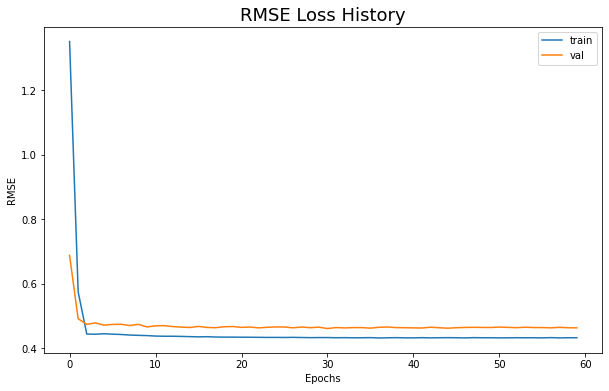

model train time: 108.961

STARTING TRAIN MF with k: 20, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.090, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

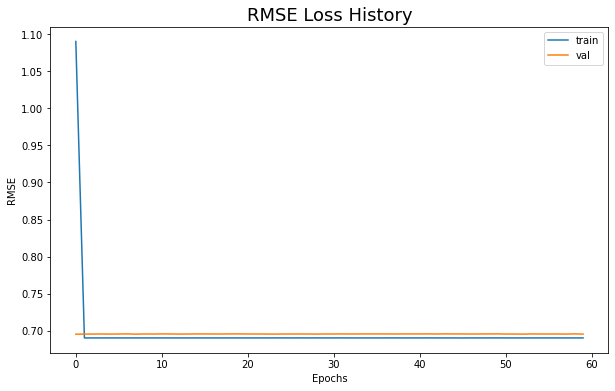

model train time: 110.354

STARTING TRAIN MF with k: 20, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.037, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

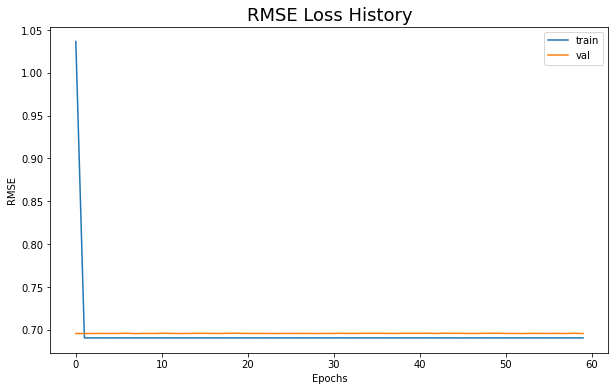

model train time: 110.268

STARTING TRAIN MF with k: 50, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 5.024, val: 3.443
EPOCH 2: Avg losses: train: 2.560, val: 1.714
EPOCH 3: Avg losses: train: 1.310, val: 0.959
EPOCH 4: Avg losses: train: 0.815, val: 0.734
EPOCH 5: Avg losses: train: 0.682, val: 0.679
EPOCH 6: Avg losses: train: 0.628, val: 0.611
EPOCH 7: Avg losses: train: 0.513, val: 0.491
EPOCH 8: Avg losses: train: 0.441, val: 0.465
EPOCH 9: Avg losses: train: 0.433, val: 0.467
EPOCH 10: Avg losses: train: 0.433, val: 0.462
EPOCH 11: Avg losses: train: 0.432, val: 0.465
EPOCH 12: Avg losses: train: 0.432, val: 0.465
EPOCH 13: Avg losses: train: 0.432, val: 0.463
EPOCH 14: Avg losses: train: 0.432, val: 0.462
EPOCH 15: Avg losses: train: 0.432, val: 0.461
EPOCH 16: Avg losses: train: 0.432, val: 0.464
EPOCH 17: Avg losses: train: 0.432, val: 0.462
EPOCH 18: Avg losses: train: 0.432, val: 0.462
EPOCH 19: Avg losses: train: 0.432, val: 0.464
EPOCH 20: Avg losses: train: 0.432, v

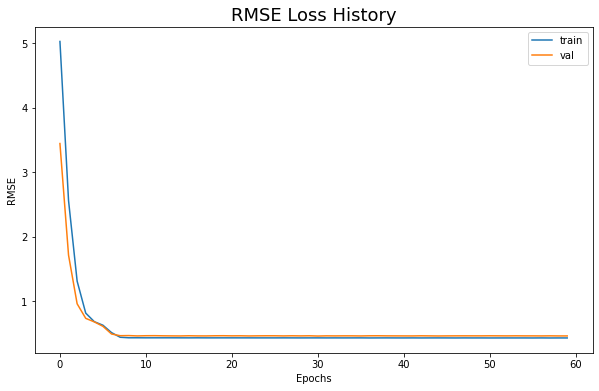

model train time: 134.281

STARTING TRAIN MF with k: 50, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 3.986, val: 1.930
EPOCH 2: Avg losses: train: 1.220, val: 0.780
EPOCH 3: Avg losses: train: 0.717, val: 0.697
EPOCH 4: Avg losses: train: 0.690, val: 0.696
EPOCH 5: Avg losses: train: 0.690, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

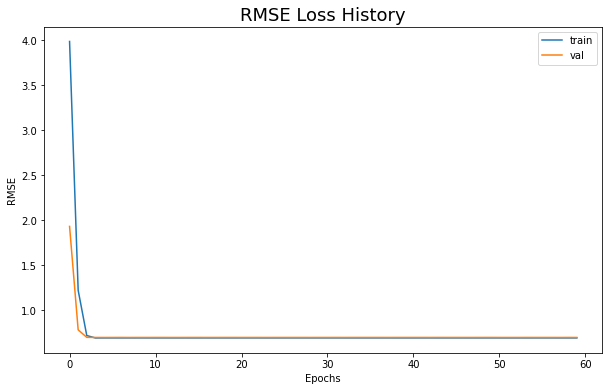

model train time: 132.705

STARTING TRAIN MF with k: 50, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 3.627, val: 1.548
EPOCH 2: Avg losses: train: 0.983, val: 0.724
EPOCH 3: Avg losses: train: 0.698, val: 0.696
EPOCH 4: Avg losses: train: 0.690, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

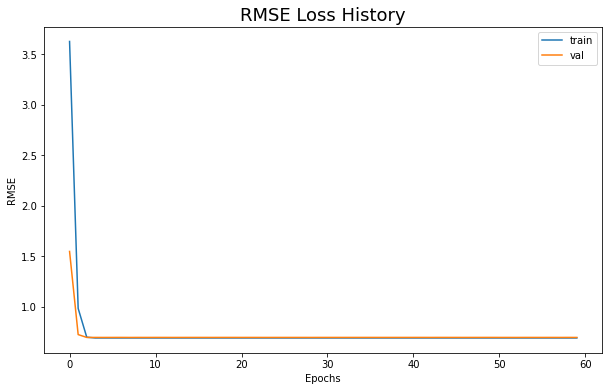

model train time: 134.086

STARTING TRAIN MF with k: 50, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 2.837, val: 0.971
EPOCH 2: Avg losses: train: 0.742, val: 0.667
EPOCH 3: Avg losses: train: 0.554, val: 0.491
EPOCH 4: Avg losses: train: 0.441, val: 0.474
EPOCH 5: Avg losses: train: 0.441, val: 0.469
EPOCH 6: Avg losses: train: 0.443, val: 0.474
EPOCH 7: Avg losses: train: 0.444, val: 0.476
EPOCH 8: Avg losses: train: 0.443, val: 0.472
EPOCH 9: Avg losses: train: 0.442, val: 0.476
EPOCH 10: Avg losses: train: 0.441, val: 0.468
EPOCH 11: Avg losses: train: 0.440, val: 0.471
EPOCH 12: Avg losses: train: 0.439, val: 0.472
EPOCH 13: Avg losses: train: 0.439, val: 0.469
EPOCH 14: Avg losses: train: 0.439, val: 0.467
EPOCH 15: Avg losses: train: 0.438, val: 0.466
EPOCH 16: Avg losses: train: 0.437, val: 0.470
EPOCH 17: Avg losses: train: 0.438, val: 0.466
EPOCH 18: Avg losses: train: 0.437, val: 0.464
EPOCH 19: Avg losses: train: 0.436, val: 0.468
EPOCH 20: Avg losses: train: 0.436, v

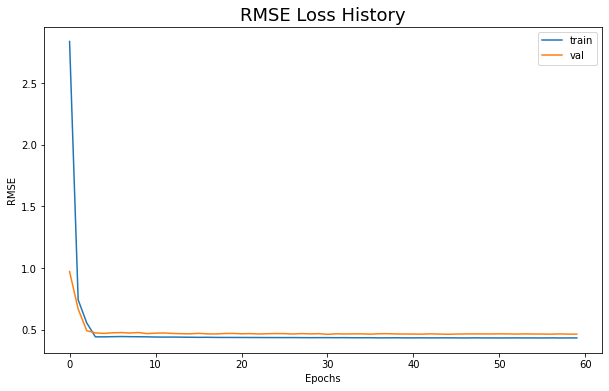

model train time: 134.589

STARTING TRAIN MF with k: 50, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.938, val: 0.700
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

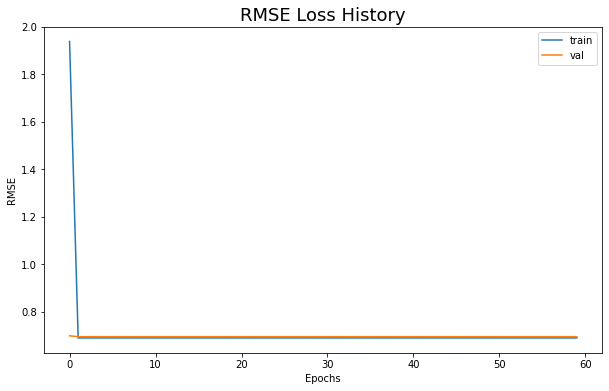

model train time: 137.654

STARTING TRAIN MF with k: 50, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.757, val: 0.697
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

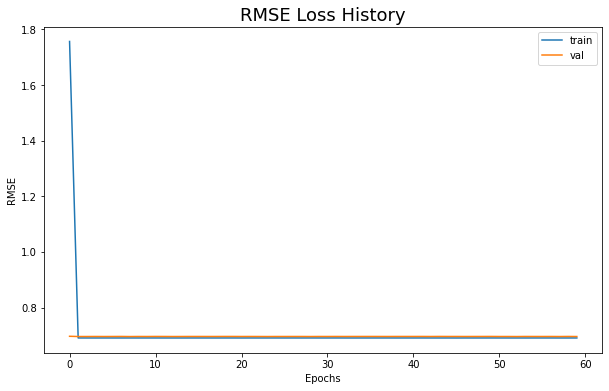

model train time: 142.662

STARTING TRAIN MF with k: 50, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.952, val: 0.698
EPOCH 2: Avg losses: train: 0.572, val: 0.487
EPOCH 3: Avg losses: train: 0.445, val: 0.478
EPOCH 4: Avg losses: train: 0.449, val: 0.486
EPOCH 5: Avg losses: train: 0.452, val: 0.478
EPOCH 6: Avg losses: train: 0.451, val: 0.480
EPOCH 7: Avg losses: train: 0.450, val: 0.481
EPOCH 8: Avg losses: train: 0.447, val: 0.477
EPOCH 9: Avg losses: train: 0.446, val: 0.480
EPOCH 10: Avg losses: train: 0.445, val: 0.471
EPOCH 11: Avg losses: train: 0.443, val: 0.474
EPOCH 12: Avg losses: train: 0.442, val: 0.476
EPOCH 13: Avg losses: train: 0.443, val: 0.472
EPOCH 14: Avg losses: train: 0.442, val: 0.470
EPOCH 15: Avg losses: train: 0.442, val: 0.469
EPOCH 16: Avg losses: train: 0.441, val: 0.473
EPOCH 17: Avg losses: train: 0.441, val: 0.468
EPOCH 18: Avg losses: train: 0.440, val: 0.467
EPOCH 19: Avg losses: train: 0.440, val: 0.471
EPOCH 20: Avg losses: train: 0.439, v

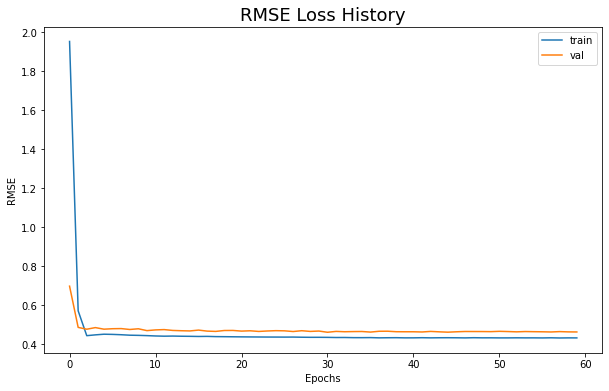

model train time: 130.608

STARTING TRAIN MF with k: 50, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.420, val: 0.696
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

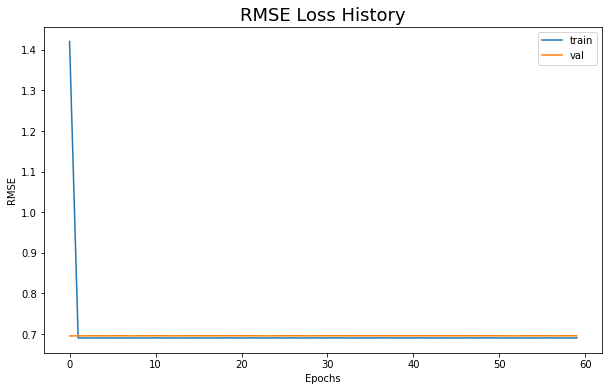

model train time: 118.412

STARTING TRAIN MF with k: 50, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.320, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, v

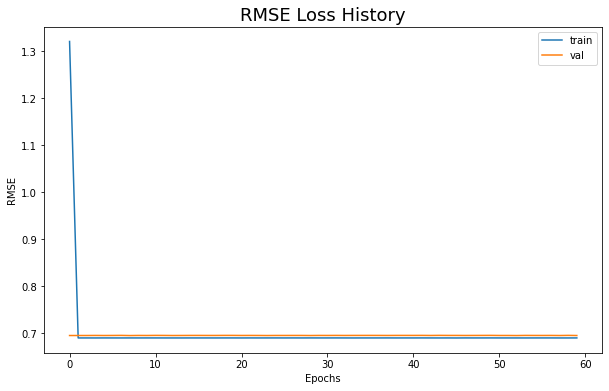

model train time: 114.773

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 7.144, val: 4.884
EPOCH 2: Avg losses: train: 3.591, val: 2.389
EPOCH 3: Avg losses: train: 1.733, val: 1.204
EPOCH 4: Avg losses: train: 0.926, val: 0.787
EPOCH 5: Avg losses: train: 0.686, val: 0.679
EPOCH 6: Avg losses: train: 0.608, val: 0.594
EPOCH 7: Avg losses: train: 0.497, val: 0.483
EPOCH 8: Avg losses: train: 0.438, val: 0.464
EPOCH 9: Avg losses: train: 0.434, val: 0.469
EPOCH 10: Avg losses: train: 0.435, val: 0.463
EPOCH 11: Avg losses: train: 0.435, val: 0.467
EPOCH 12: Avg losses: train: 0.435, val: 0.468
EPOCH 13: Avg losses: train: 0.435, val: 0.465
EPOCH 14: Avg losses: train: 0.435, val: 0.464
EPOCH 15: Avg losses: train: 0.434, val: 0.463
EPOCH 16: Avg losses: train: 0.434, val: 0.466
EPOCH 17: Avg losses: train: 0.434, val: 0.463
EPOCH 18: Avg losses: train: 0.433, val: 0.463
EPOCH 19: Avg losses: train: 0.433, val: 0.465
EPOCH 20: Avg losses: train: 0.433, 

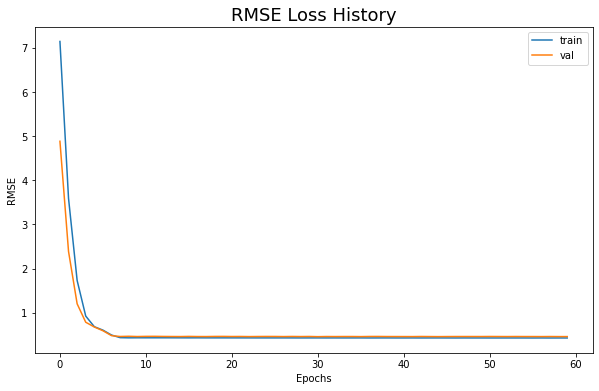

model train time: 133.465

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 5.616, val: 2.623
EPOCH 2: Avg losses: train: 1.551, val: 0.846
EPOCH 3: Avg losses: train: 0.736, val: 0.697
EPOCH 4: Avg losses: train: 0.689, val: 0.696
EPOCH 5: Avg losses: train: 0.690, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

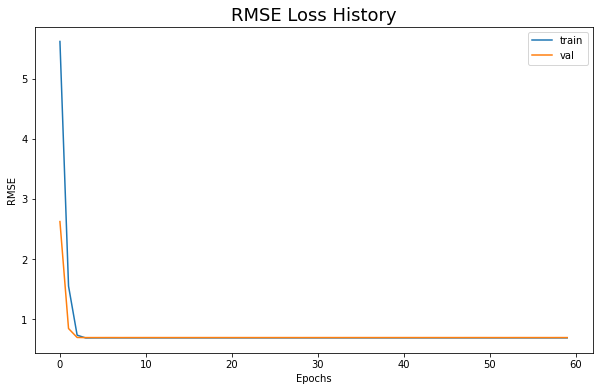

model train time: 164.333

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 5.091, val: 2.045
EPOCH 2: Avg losses: train: 1.181, val: 0.746
EPOCH 3: Avg losses: train: 0.702, val: 0.696
EPOCH 4: Avg losses: train: 0.690, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

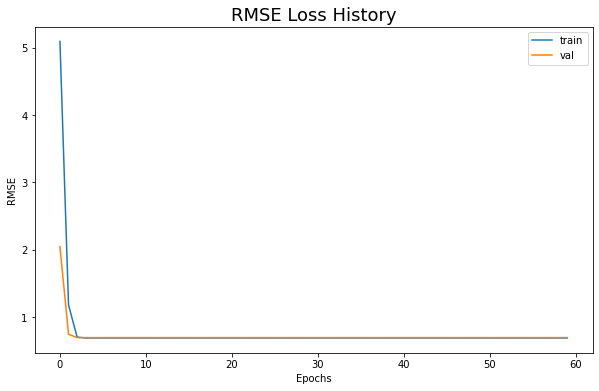

model train time: 134.924

STARTING TRAIN MF with k: 100, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 4.020, val: 1.222
EPOCH 2: Avg losses: train: 0.796, val: 0.659
EPOCH 3: Avg losses: train: 0.533, val: 0.483
EPOCH 4: Avg losses: train: 0.440, val: 0.475
EPOCH 5: Avg losses: train: 0.443, val: 0.472
EPOCH 6: Avg losses: train: 0.447, val: 0.478
EPOCH 7: Avg losses: train: 0.448, val: 0.480
EPOCH 8: Avg losses: train: 0.446, val: 0.476
EPOCH 9: Avg losses: train: 0.445, val: 0.479
EPOCH 10: Avg losses: train: 0.444, val: 0.470
EPOCH 11: Avg losses: train: 0.442, val: 0.473
EPOCH 12: Avg losses: train: 0.441, val: 0.474
EPOCH 13: Avg losses: train: 0.441, val: 0.470
EPOCH 14: Avg losses: train: 0.440, val: 0.468
EPOCH 15: Avg losses: train: 0.439, val: 0.467
EPOCH 16: Avg losses: train: 0.438, val: 0.470
EPOCH 17: Avg losses: train: 0.438, val: 0.466
EPOCH 18: Avg losses: train: 0.437, val: 0.465
EPOCH 19: Avg losses: train: 0.437, val: 0.469
EPOCH 20: Avg losses: train: 0.436, 

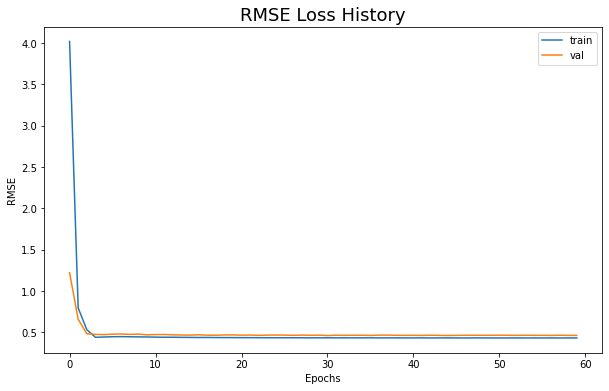

model train time: 158.939

STARTING TRAIN MF with k: 100, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 2.589, val: 0.702
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

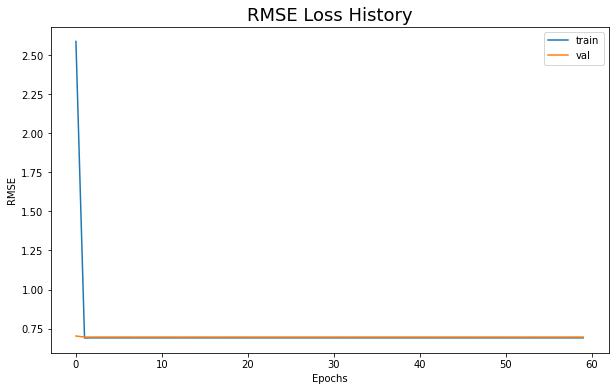

model train time: 161.380

STARTING TRAIN MF with k: 100, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 2.305, val: 0.697
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

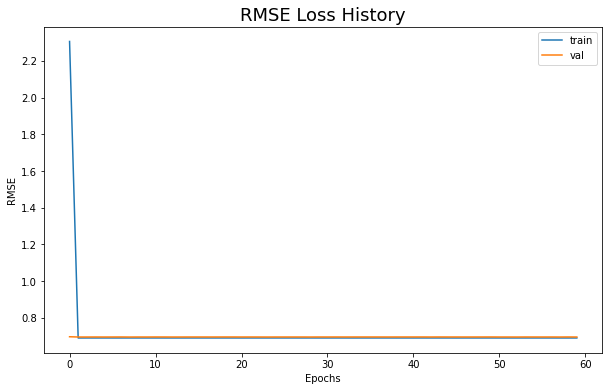

model train time: 162.469

STARTING TRAIN MF with k: 100, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 2.674, val: 0.714
EPOCH 2: Avg losses: train: 0.561, val: 0.483
EPOCH 3: Avg losses: train: 0.445, val: 0.480
EPOCH 4: Avg losses: train: 0.452, val: 0.490
EPOCH 5: Avg losses: train: 0.457, val: 0.482
EPOCH 6: Avg losses: train: 0.456, val: 0.483
EPOCH 7: Avg losses: train: 0.452, val: 0.482
EPOCH 8: Avg losses: train: 0.448, val: 0.476
EPOCH 9: Avg losses: train: 0.446, val: 0.479
EPOCH 10: Avg losses: train: 0.444, val: 0.470
EPOCH 11: Avg losses: train: 0.442, val: 0.473
EPOCH 12: Avg losses: train: 0.441, val: 0.474
EPOCH 13: Avg losses: train: 0.441, val: 0.470
EPOCH 14: Avg losses: train: 0.440, val: 0.468
EPOCH 15: Avg losses: train: 0.439, val: 0.466
EPOCH 16: Avg losses: train: 0.438, val: 0.470
EPOCH 17: Avg losses: train: 0.438, val: 0.466
EPOCH 18: Avg losses: train: 0.437, val: 0.465
EPOCH 19: Avg losses: train: 0.437, val: 0.469
EPOCH 20: Avg losses: train: 0.437, 

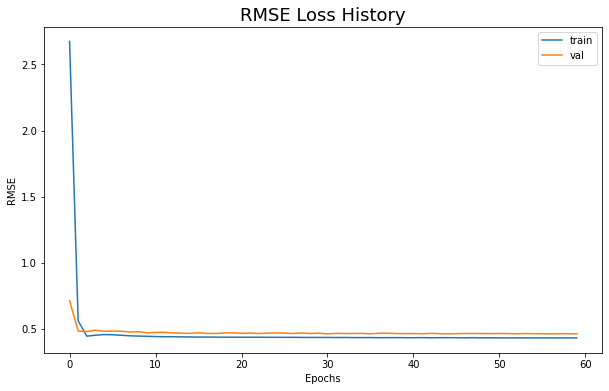

model train time: 160.036

STARTING TRAIN MF with k: 100, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.800, val: 0.695
EPOCH 2: Avg losses: train: 0.690, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

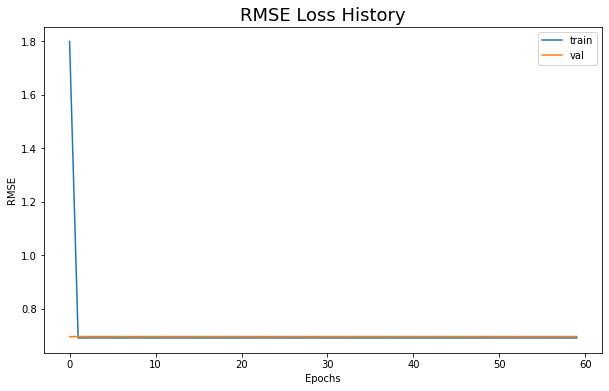

model train time: 130.288

STARTING TRAIN MF with k: 100, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.644, val: 0.696
EPOCH 2: Avg losses: train: 0.691, val: 0.696
EPOCH 3: Avg losses: train: 0.691, val: 0.696
EPOCH 4: Avg losses: train: 0.691, val: 0.696
EPOCH 5: Avg losses: train: 0.691, val: 0.696
EPOCH 6: Avg losses: train: 0.691, val: 0.696
EPOCH 7: Avg losses: train: 0.691, val: 0.696
EPOCH 8: Avg losses: train: 0.691, val: 0.696
EPOCH 9: Avg losses: train: 0.691, val: 0.696
EPOCH 10: Avg losses: train: 0.691, val: 0.696
EPOCH 11: Avg losses: train: 0.691, val: 0.696
EPOCH 12: Avg losses: train: 0.691, val: 0.696
EPOCH 13: Avg losses: train: 0.691, val: 0.696
EPOCH 14: Avg losses: train: 0.691, val: 0.696
EPOCH 15: Avg losses: train: 0.691, val: 0.696
EPOCH 16: Avg losses: train: 0.691, val: 0.696
EPOCH 17: Avg losses: train: 0.691, val: 0.696
EPOCH 18: Avg losses: train: 0.691, val: 0.696
EPOCH 19: Avg losses: train: 0.691, val: 0.696
EPOCH 20: Avg losses: train: 0.691, 

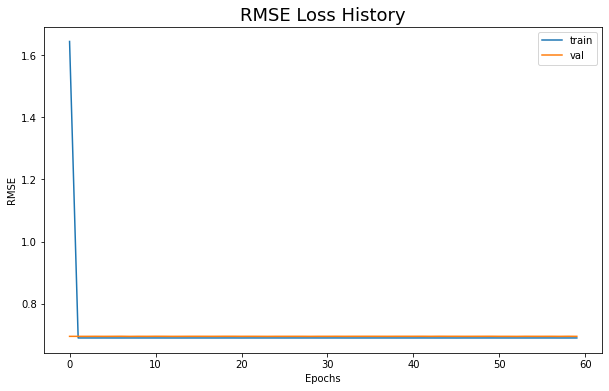

model train time: 165.772



In [5]:
import json
from time import time
from utils.plots import plot_train_history

epochs = 60
batch_size = 64

for k in [10, 15, 20, 50, 100]:
    for lr in [0.001, 0.003, 0.005]:
        for reg in [0.001, 0.003, 0.005]:
            print(f'STARTING TRAIN MF with k: {k}, lr: {lr}, reg: {reg}')
            start_time = time()
            model_dict = {}
            num_users = train.user_id.max() + 1
            num_items = train.item_id.max() + 1

            # Init model and trainer
            model = MatrixFactorization(num_users, num_items, k=k)
            mf_trainer = MFTrainer(train, test, model, epochs=epochs, lr=lr, reg=reg, batch_size=batch_size)

            # Train
            mf_trainer.train_model()

            # Save parmas to model_dict
            model_dict['model_params'] = model.params()
            model_dict.update(mf_trainer.params())
            model_dict['train_losses'] = mf_trainer.train_losses
            model_dict['val_losses'] = mf_trainer.val_losses

            # Save model params to json file
            file_name = f'models_params/MF_{k}_{lr}_{reg}'
            with open(file_name, 'w') as f:
                json.dump(model_dict, f, indent=4)

            plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)
            print(f'model train time: {time() - start_time:.3f}\n')




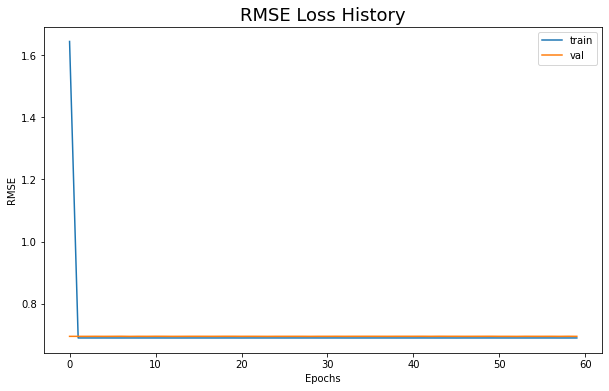

In [6]:
plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)

# AutoRec

In [7]:
from src.data_prep import movielens_create_ratings
train, test = movielens_create_ratings(1)
train

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5,3,4,3,3,0,4,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
940,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.660, val: 1.106
EPOCH 2: Avg losses: train: 1.015, val: 0.969
EPOCH 3: Avg losses: train: 0.949, val: 0.962
EPOCH 4: Avg losses: train: 0.921, val: 0.932
EPOCH 5: Avg losses: train: 0.899, val: 0.920
EPOCH 6: Avg losses: train: 0.881, val: 0.891
EPOCH 7: Avg losses: train: 0.859, val: 0.882
EPOCH 8: Avg losses: train: 0.848, val: 0.874
EPOCH 9: Avg losses: train: 0.833, val: 0.878
EPOCH 10: Avg losses: train: 0.821, val: 0.872
EPOCH 11: Avg losses: train: 0.814, val: 0.879
EPOCH 12: Avg losses: train: 0.802, val: 0.846
EPOCH 13: Avg losses: train: 0.790, val: 0.859
EPOCH 14: Avg losses: train: 0.780, val: 0.845
EPOCH 15: Avg losses: train: 0.775, val: 0.849
EPOCH 16: Avg losses: train: 0.770, val: 0.841
EPOCH 17: Avg losses: train: 0.764, val: 0.832
EPOCH 18: Avg losses: train: 0.750, val: 0.828
EPOCH 19: Avg losses: train: 0.743, val: 0.817
EPOCH 20: Avg losses: train: 0.734, val: 0.817
EP

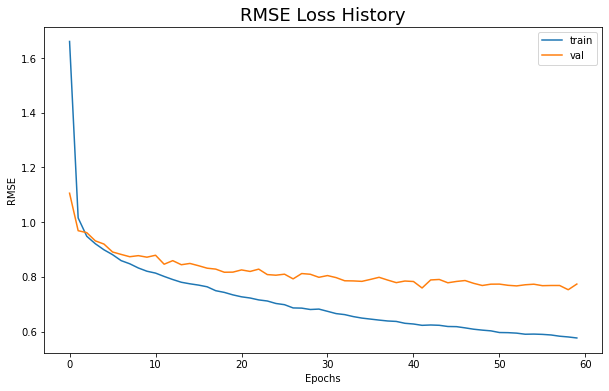

model train time: 23.188

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 1.676, val: 1.119
EPOCH 2: Avg losses: train: 1.019, val: 0.975
EPOCH 3: Avg losses: train: 0.959, val: 0.983
EPOCH 4: Avg losses: train: 0.943, val: 0.960
EPOCH 5: Avg losses: train: 0.933, val: 0.950
EPOCH 6: Avg losses: train: 0.927, val: 0.929
EPOCH 7: Avg losses: train: 0.919, val: 0.930
EPOCH 8: Avg losses: train: 0.919, val: 0.917
EPOCH 9: Avg losses: train: 0.912, val: 0.935
EPOCH 10: Avg losses: train: 0.909, val: 0.919
EPOCH 11: Avg losses: train: 0.909, val: 0.942
EPOCH 12: Avg losses: train: 0.904, val: 0.908
EPOCH 13: Avg losses: train: 0.899, val: 0.927
EPOCH 14: Avg losses: train: 0.899, val: 0.918
EPOCH 15: Avg losses: train: 0.903, val: 0.926
EPOCH 16: Avg losses: train: 0.906, val: 0.920
EPOCH 17: Avg losses: train: 0.907, val: 0.908
EPOCH 18: Avg losses: train: 0.898, val: 0.914
EPOCH 19: Avg losses: train: 0.899, val: 0.903
EPOCH 20: Avg losses: t

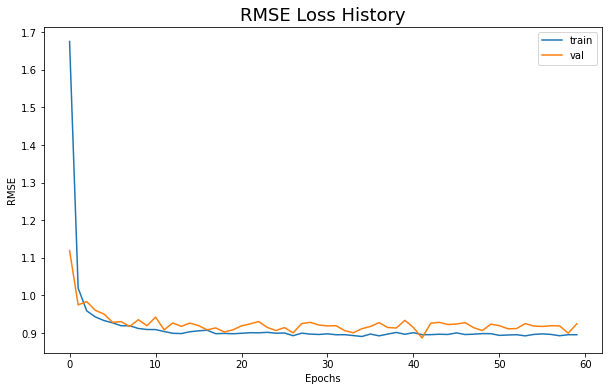

model train time: 22.346

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 1.687, val: 1.128
EPOCH 2: Avg losses: train: 1.025, val: 0.985
EPOCH 3: Avg losses: train: 0.973, val: 1.004
EPOCH 4: Avg losses: train: 0.963, val: 0.986
EPOCH 5: Avg losses: train: 0.960, val: 0.979
EPOCH 6: Avg losses: train: 0.960, val: 0.960
EPOCH 7: Avg losses: train: 0.957, val: 0.961
EPOCH 8: Avg losses: train: 0.959, val: 0.952
EPOCH 9: Avg losses: train: 0.952, val: 0.969
EPOCH 10: Avg losses: train: 0.950, val: 0.952
EPOCH 11: Avg losses: train: 0.952, val: 0.980
EPOCH 12: Avg losses: train: 0.948, val: 0.946
EPOCH 13: Avg losses: train: 0.943, val: 0.966
EPOCH 14: Avg losses: train: 0.942, val: 0.955
EPOCH 15: Avg losses: train: 0.949, val: 0.964
EPOCH 16: Avg losses: train: 0.949, val: 0.959
EPOCH 17: Avg losses: train: 0.953, val: 0.949
EPOCH 18: Avg losses: train: 0.945, val: 0.952
EPOCH 19: Avg losses: train: 0.944, val: 0.947
EPOCH 20: Avg losses: t

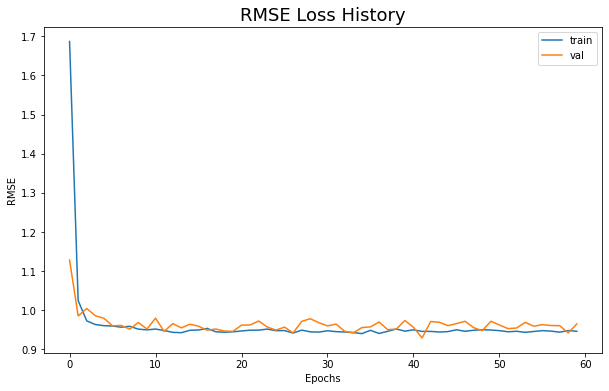

model train time: 22.748

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.414, val: 1.061
EPOCH 2: Avg losses: train: 1.005, val: 0.966
EPOCH 3: Avg losses: train: 0.941, val: 0.956
EPOCH 4: Avg losses: train: 0.922, val: 0.931
EPOCH 5: Avg losses: train: 0.903, val: 0.918
EPOCH 6: Avg losses: train: 0.894, val: 0.897
EPOCH 7: Avg losses: train: 0.879, val: 0.891
EPOCH 8: Avg losses: train: 0.871, val: 0.885
EPOCH 9: Avg losses: train: 0.863, val: 0.903
EPOCH 10: Avg losses: train: 0.852, val: 0.879
EPOCH 11: Avg losses: train: 0.849, val: 0.904
EPOCH 12: Avg losses: train: 0.845, val: 0.876
EPOCH 13: Avg losses: train: 0.829, val: 0.873
EPOCH 14: Avg losses: train: 0.822, val: 0.866
EPOCH 15: Avg losses: train: 0.827, val: 0.884
EPOCH 16: Avg losses: train: 0.826, val: 0.877
EPOCH 17: Avg losses: train: 0.820, val: 0.872
EPOCH 18: Avg losses: train: 0.804, val: 0.857
EPOCH 19: Avg losses: train: 0.806, val: 0.845
EPOCH 20: Avg losses: t

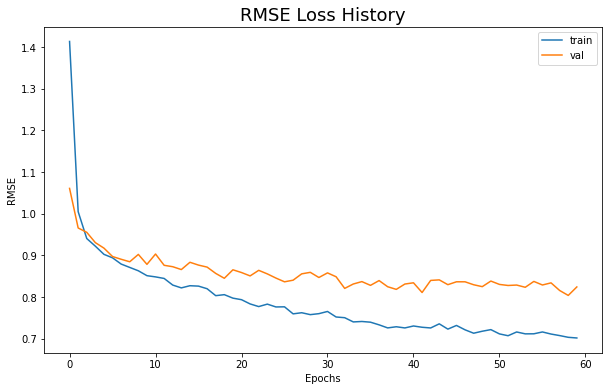

model train time: 22.631

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.410, val: 1.062
EPOCH 2: Avg losses: train: 1.023, val: 0.992
EPOCH 3: Avg losses: train: 0.983, val: 1.002
EPOCH 4: Avg losses: train: 0.981, val: 0.986
EPOCH 5: Avg losses: train: 0.978, val: 0.977
EPOCH 6: Avg losses: train: 0.978, val: 0.962
EPOCH 7: Avg losses: train: 0.973, val: 0.969
EPOCH 8: Avg losses: train: 0.975, val: 0.969
EPOCH 9: Avg losses: train: 0.974, val: 0.977
EPOCH 10: Avg losses: train: 0.968, val: 0.960
EPOCH 11: Avg losses: train: 0.971, val: 0.990
EPOCH 12: Avg losses: train: 0.970, val: 0.967
EPOCH 13: Avg losses: train: 0.968, val: 0.971
EPOCH 14: Avg losses: train: 0.966, val: 0.958
EPOCH 15: Avg losses: train: 0.974, val: 0.982
EPOCH 16: Avg losses: train: 0.982, val: 0.974
EPOCH 17: Avg losses: train: 0.986, val: 0.970
EPOCH 18: Avg losses: train: 0.969, val: 0.965
EPOCH 19: Avg losses: train: 0.967, val: 0.954
EPOCH 20: Avg losses: t

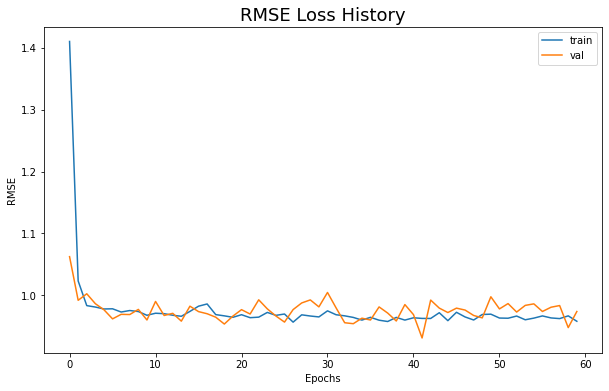

model train time: 22.580

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.412, val: 1.073
EPOCH 2: Avg losses: train: 1.044, val: 1.012
EPOCH 3: Avg losses: train: 1.014, val: 1.035
EPOCH 4: Avg losses: train: 1.015, val: 1.023
EPOCH 5: Avg losses: train: 1.017, val: 1.017
EPOCH 6: Avg losses: train: 1.018, val: 1.003
EPOCH 7: Avg losses: train: 1.016, val: 1.011
EPOCH 8: Avg losses: train: 1.022, val: 1.025
EPOCH 9: Avg losses: train: 1.018, val: 1.020
EPOCH 10: Avg losses: train: 1.012, val: 1.004
EPOCH 11: Avg losses: train: 1.012, val: 1.035
EPOCH 12: Avg losses: train: 1.017, val: 1.012
EPOCH 13: Avg losses: train: 1.009, val: 1.012
EPOCH 14: Avg losses: train: 1.012, val: 0.998
EPOCH 15: Avg losses: train: 1.014, val: 1.014
EPOCH 16: Avg losses: train: 1.023, val: 1.031
EPOCH 17: Avg losses: train: 1.035, val: 1.016
EPOCH 18: Avg losses: train: 1.014, val: 1.023
EPOCH 19: Avg losses: train: 1.010, val: 1.002
EPOCH 20: Avg losses: t

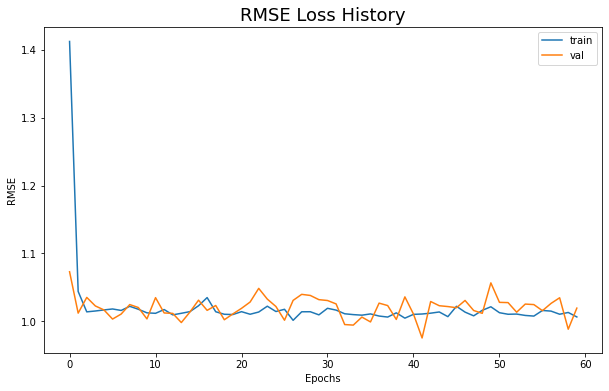

model train time: 22.662

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.412, val: 1.061
EPOCH 2: Avg losses: train: 1.025, val: 0.970
EPOCH 3: Avg losses: train: 0.973, val: 0.981
EPOCH 4: Avg losses: train: 0.956, val: 0.955
EPOCH 5: Avg losses: train: 0.940, val: 0.947
EPOCH 6: Avg losses: train: 0.935, val: 0.927
EPOCH 7: Avg losses: train: 0.923, val: 0.923
EPOCH 8: Avg losses: train: 0.921, val: 0.923
EPOCH 9: Avg losses: train: 0.915, val: 0.936
EPOCH 10: Avg losses: train: 0.909, val: 0.920
EPOCH 11: Avg losses: train: 0.902, val: 0.938
EPOCH 12: Avg losses: train: 0.900, val: 0.928
EPOCH 13: Avg losses: train: 0.896, val: 0.920
EPOCH 14: Avg losses: train: 0.901, val: 0.906
EPOCH 15: Avg losses: train: 0.895, val: 0.922
EPOCH 16: Avg losses: train: 0.894, val: 0.918
EPOCH 17: Avg losses: train: 0.896, val: 0.912
EPOCH 18: Avg losses: train: 0.885, val: 0.905
EPOCH 19: Avg losses: train: 0.884, val: 0.886
EPOCH 20: Avg losses: t

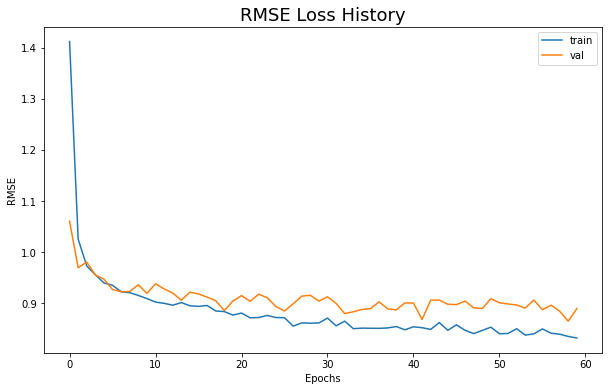

model train time: 22.661

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.406, val: 1.060
EPOCH 2: Avg losses: train: 1.053, val: 1.015
EPOCH 3: Avg losses: train: 1.016, val: 1.031
EPOCH 4: Avg losses: train: 1.018, val: 1.033
EPOCH 5: Avg losses: train: 1.023, val: 1.026
EPOCH 6: Avg losses: train: 1.025, val: 1.007
EPOCH 7: Avg losses: train: 1.020, val: 1.010
EPOCH 8: Avg losses: train: 1.024, val: 1.016
EPOCH 9: Avg losses: train: 1.017, val: 1.021
EPOCH 10: Avg losses: train: 1.014, val: 0.999
EPOCH 11: Avg losses: train: 1.015, val: 1.045
EPOCH 12: Avg losses: train: 1.019, val: 1.012
EPOCH 13: Avg losses: train: 1.006, val: 1.022
EPOCH 14: Avg losses: train: 1.017, val: 0.997
EPOCH 15: Avg losses: train: 1.011, val: 1.017
EPOCH 16: Avg losses: train: 1.021, val: 1.048
EPOCH 17: Avg losses: train: 1.030, val: 1.016
EPOCH 18: Avg losses: train: 1.007, val: 1.011
EPOCH 19: Avg losses: train: 1.011, val: 1.008
EPOCH 20: Avg losses: t

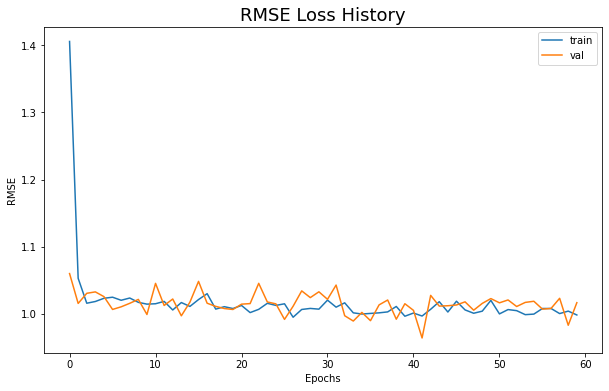

model train time: 22.361

STARTING TRAIN AutoRec with num_hidden: 100, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.403, val: 1.102
EPOCH 2: Avg losses: train: 1.082, val: 1.064
EPOCH 3: Avg losses: train: 1.049, val: 1.074
EPOCH 4: Avg losses: train: 1.053, val: 1.084
EPOCH 5: Avg losses: train: 1.068, val: 1.071
EPOCH 6: Avg losses: train: 1.069, val: 1.054
EPOCH 7: Avg losses: train: 1.062, val: 1.051
EPOCH 8: Avg losses: train: 1.062, val: 1.052
EPOCH 9: Avg losses: train: 1.048, val: 1.055
EPOCH 10: Avg losses: train: 1.055, val: 1.037
EPOCH 11: Avg losses: train: 1.055, val: 1.089
EPOCH 12: Avg losses: train: 1.064, val: 1.052
EPOCH 13: Avg losses: train: 1.046, val: 1.068
EPOCH 14: Avg losses: train: 1.058, val: 1.032
EPOCH 15: Avg losses: train: 1.049, val: 1.066
EPOCH 16: Avg losses: train: 1.060, val: 1.094
EPOCH 17: Avg losses: train: 1.068, val: 1.045
EPOCH 18: Avg losses: train: 1.054, val: 1.062
EPOCH 19: Avg losses: train: 1.055, val: 1.044
EPOCH 20: Avg losses: t

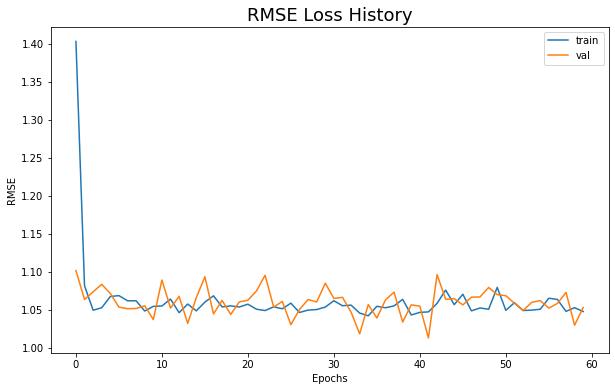

model train time: 22.615

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.671, val: 1.110
EPOCH 2: Avg losses: train: 1.015, val: 0.968
EPOCH 3: Avg losses: train: 0.948, val: 0.959
EPOCH 4: Avg losses: train: 0.920, val: 0.929
EPOCH 5: Avg losses: train: 0.899, val: 0.919
EPOCH 6: Avg losses: train: 0.881, val: 0.892
EPOCH 7: Avg losses: train: 0.859, val: 0.883
EPOCH 8: Avg losses: train: 0.847, val: 0.873
EPOCH 9: Avg losses: train: 0.832, val: 0.877
EPOCH 10: Avg losses: train: 0.820, val: 0.874
EPOCH 11: Avg losses: train: 0.813, val: 0.878
EPOCH 12: Avg losses: train: 0.801, val: 0.846
EPOCH 13: Avg losses: train: 0.790, val: 0.860
EPOCH 14: Avg losses: train: 0.780, val: 0.845
EPOCH 15: Avg losses: train: 0.775, val: 0.852
EPOCH 16: Avg losses: train: 0.771, val: 0.844
EPOCH 17: Avg losses: train: 0.766, val: 0.834
EPOCH 18: Avg losses: train: 0.752, val: 0.828
EPOCH 19: Avg losses: train: 0.743, val: 0.817
EPOCH 20: Avg losses: t

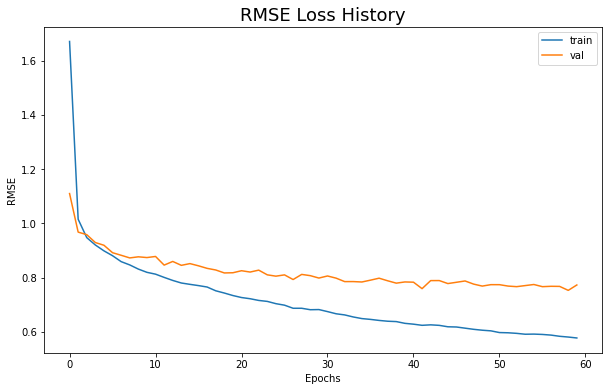

model train time: 22.711

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 1.676, val: 1.119
EPOCH 2: Avg losses: train: 1.019, val: 0.975
EPOCH 3: Avg losses: train: 0.959, val: 0.983
EPOCH 4: Avg losses: train: 0.943, val: 0.960
EPOCH 5: Avg losses: train: 0.933, val: 0.950
EPOCH 6: Avg losses: train: 0.927, val: 0.929
EPOCH 7: Avg losses: train: 0.919, val: 0.930
EPOCH 8: Avg losses: train: 0.919, val: 0.917
EPOCH 9: Avg losses: train: 0.912, val: 0.935
EPOCH 10: Avg losses: train: 0.909, val: 0.919
EPOCH 11: Avg losses: train: 0.909, val: 0.942
EPOCH 12: Avg losses: train: 0.904, val: 0.908
EPOCH 13: Avg losses: train: 0.899, val: 0.927
EPOCH 14: Avg losses: train: 0.899, val: 0.918
EPOCH 15: Avg losses: train: 0.903, val: 0.926
EPOCH 16: Avg losses: train: 0.906, val: 0.920
EPOCH 17: Avg losses: train: 0.907, val: 0.908
EPOCH 18: Avg losses: train: 0.898, val: 0.914
EPOCH 19: Avg losses: train: 0.899, val: 0.903
EPOCH 20: Avg losses: t

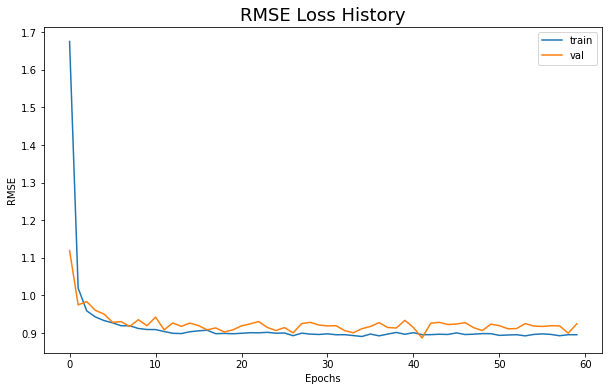

model train time: 22.531

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 1.687, val: 1.128
EPOCH 2: Avg losses: train: 1.025, val: 0.985
EPOCH 3: Avg losses: train: 0.973, val: 1.004
EPOCH 4: Avg losses: train: 0.963, val: 0.986
EPOCH 5: Avg losses: train: 0.960, val: 0.979
EPOCH 6: Avg losses: train: 0.960, val: 0.960
EPOCH 7: Avg losses: train: 0.957, val: 0.961
EPOCH 8: Avg losses: train: 0.959, val: 0.952
EPOCH 9: Avg losses: train: 0.952, val: 0.969
EPOCH 10: Avg losses: train: 0.950, val: 0.952
EPOCH 11: Avg losses: train: 0.952, val: 0.980
EPOCH 12: Avg losses: train: 0.948, val: 0.946
EPOCH 13: Avg losses: train: 0.943, val: 0.966
EPOCH 14: Avg losses: train: 0.942, val: 0.955
EPOCH 15: Avg losses: train: 0.949, val: 0.964
EPOCH 16: Avg losses: train: 0.949, val: 0.959
EPOCH 17: Avg losses: train: 0.953, val: 0.949
EPOCH 18: Avg losses: train: 0.945, val: 0.952
EPOCH 19: Avg losses: train: 0.944, val: 0.947
EPOCH 20: Avg losses: t

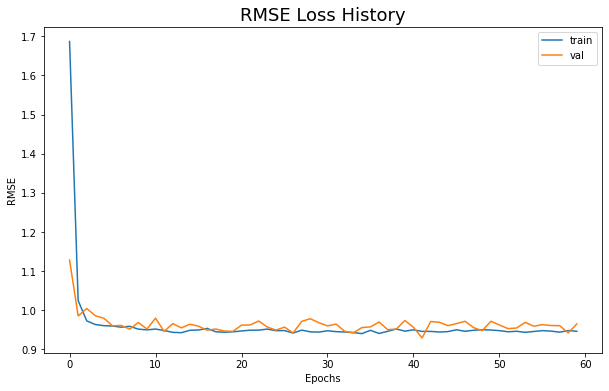

model train time: 22.676

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.414, val: 1.061
EPOCH 2: Avg losses: train: 1.005, val: 0.966
EPOCH 3: Avg losses: train: 0.941, val: 0.956
EPOCH 4: Avg losses: train: 0.922, val: 0.931
EPOCH 5: Avg losses: train: 0.903, val: 0.918
EPOCH 6: Avg losses: train: 0.894, val: 0.897
EPOCH 7: Avg losses: train: 0.879, val: 0.891
EPOCH 8: Avg losses: train: 0.871, val: 0.885
EPOCH 9: Avg losses: train: 0.863, val: 0.903
EPOCH 10: Avg losses: train: 0.852, val: 0.879
EPOCH 11: Avg losses: train: 0.849, val: 0.904
EPOCH 12: Avg losses: train: 0.845, val: 0.876
EPOCH 13: Avg losses: train: 0.829, val: 0.873
EPOCH 14: Avg losses: train: 0.822, val: 0.866
EPOCH 15: Avg losses: train: 0.827, val: 0.884
EPOCH 16: Avg losses: train: 0.826, val: 0.877
EPOCH 17: Avg losses: train: 0.820, val: 0.872
EPOCH 18: Avg losses: train: 0.804, val: 0.857
EPOCH 19: Avg losses: train: 0.806, val: 0.845
EPOCH 20: Avg losses: t

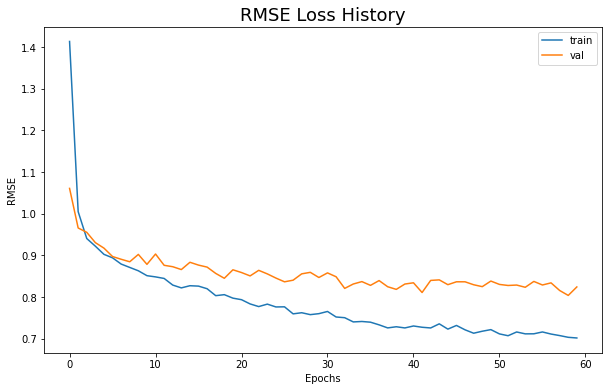

model train time: 22.561

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.410, val: 1.062
EPOCH 2: Avg losses: train: 1.023, val: 0.992
EPOCH 3: Avg losses: train: 0.983, val: 1.002
EPOCH 4: Avg losses: train: 0.981, val: 0.986
EPOCH 5: Avg losses: train: 0.978, val: 0.977
EPOCH 6: Avg losses: train: 0.978, val: 0.962
EPOCH 7: Avg losses: train: 0.973, val: 0.969
EPOCH 8: Avg losses: train: 0.975, val: 0.969
EPOCH 9: Avg losses: train: 0.974, val: 0.977
EPOCH 10: Avg losses: train: 0.968, val: 0.960
EPOCH 11: Avg losses: train: 0.971, val: 0.990
EPOCH 12: Avg losses: train: 0.970, val: 0.967
EPOCH 13: Avg losses: train: 0.968, val: 0.971
EPOCH 14: Avg losses: train: 0.966, val: 0.958
EPOCH 15: Avg losses: train: 0.974, val: 0.982
EPOCH 16: Avg losses: train: 0.982, val: 0.974
EPOCH 17: Avg losses: train: 0.986, val: 0.970
EPOCH 18: Avg losses: train: 0.969, val: 0.965
EPOCH 19: Avg losses: train: 0.967, val: 0.954
EPOCH 20: Avg losses: t

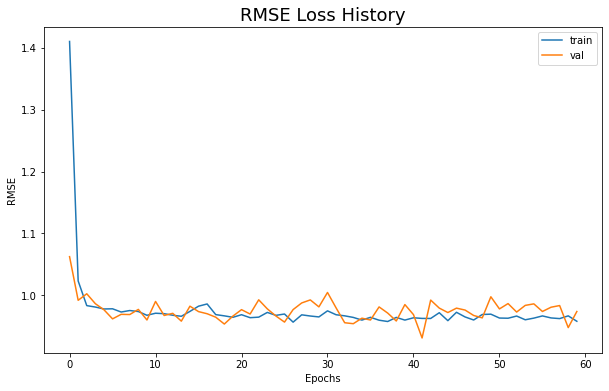

model train time: 22.723

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.412, val: 1.073
EPOCH 2: Avg losses: train: 1.044, val: 1.012
EPOCH 3: Avg losses: train: 1.014, val: 1.035
EPOCH 4: Avg losses: train: 1.015, val: 1.023
EPOCH 5: Avg losses: train: 1.017, val: 1.017
EPOCH 6: Avg losses: train: 1.018, val: 1.003
EPOCH 7: Avg losses: train: 1.016, val: 1.011
EPOCH 8: Avg losses: train: 1.022, val: 1.025
EPOCH 9: Avg losses: train: 1.018, val: 1.020
EPOCH 10: Avg losses: train: 1.012, val: 1.004
EPOCH 11: Avg losses: train: 1.012, val: 1.035
EPOCH 12: Avg losses: train: 1.017, val: 1.012
EPOCH 13: Avg losses: train: 1.009, val: 1.012
EPOCH 14: Avg losses: train: 1.012, val: 0.998
EPOCH 15: Avg losses: train: 1.014, val: 1.014
EPOCH 16: Avg losses: train: 1.023, val: 1.031
EPOCH 17: Avg losses: train: 1.035, val: 1.016
EPOCH 18: Avg losses: train: 1.014, val: 1.023
EPOCH 19: Avg losses: train: 1.010, val: 1.002
EPOCH 20: Avg losses: t

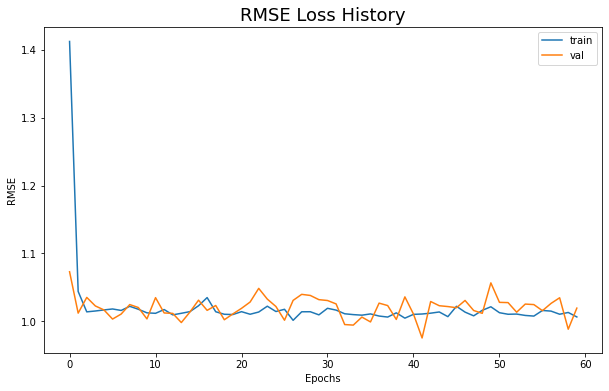

model train time: 22.753

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.412, val: 1.061
EPOCH 2: Avg losses: train: 1.025, val: 0.970
EPOCH 3: Avg losses: train: 0.973, val: 0.981
EPOCH 4: Avg losses: train: 0.956, val: 0.955
EPOCH 5: Avg losses: train: 0.940, val: 0.947
EPOCH 6: Avg losses: train: 0.935, val: 0.927
EPOCH 7: Avg losses: train: 0.923, val: 0.923
EPOCH 8: Avg losses: train: 0.921, val: 0.923
EPOCH 9: Avg losses: train: 0.915, val: 0.936
EPOCH 10: Avg losses: train: 0.909, val: 0.920
EPOCH 11: Avg losses: train: 0.902, val: 0.938
EPOCH 12: Avg losses: train: 0.900, val: 0.928
EPOCH 13: Avg losses: train: 0.896, val: 0.920
EPOCH 14: Avg losses: train: 0.901, val: 0.906
EPOCH 15: Avg losses: train: 0.895, val: 0.922
EPOCH 16: Avg losses: train: 0.894, val: 0.918
EPOCH 17: Avg losses: train: 0.896, val: 0.912
EPOCH 18: Avg losses: train: 0.885, val: 0.905
EPOCH 19: Avg losses: train: 0.884, val: 0.886
EPOCH 20: Avg losses: t

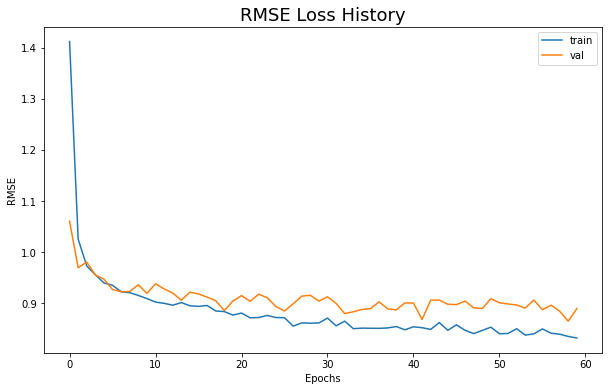

model train time: 22.755

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.406, val: 1.060
EPOCH 2: Avg losses: train: 1.053, val: 1.015
EPOCH 3: Avg losses: train: 1.016, val: 1.031
EPOCH 4: Avg losses: train: 1.018, val: 1.033
EPOCH 5: Avg losses: train: 1.023, val: 1.026
EPOCH 6: Avg losses: train: 1.025, val: 1.007
EPOCH 7: Avg losses: train: 1.020, val: 1.010
EPOCH 8: Avg losses: train: 1.024, val: 1.016
EPOCH 9: Avg losses: train: 1.017, val: 1.021
EPOCH 10: Avg losses: train: 1.014, val: 0.999
EPOCH 11: Avg losses: train: 1.015, val: 1.045
EPOCH 12: Avg losses: train: 1.019, val: 1.012
EPOCH 13: Avg losses: train: 1.006, val: 1.022
EPOCH 14: Avg losses: train: 1.017, val: 0.997
EPOCH 15: Avg losses: train: 1.011, val: 1.017
EPOCH 16: Avg losses: train: 1.021, val: 1.048
EPOCH 17: Avg losses: train: 1.030, val: 1.016
EPOCH 18: Avg losses: train: 1.007, val: 1.011
EPOCH 19: Avg losses: train: 1.011, val: 1.008
EPOCH 20: Avg losses: t

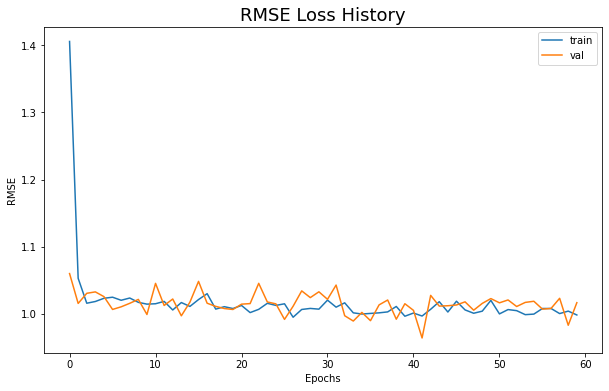

model train time: 22.636

STARTING TRAIN AutoRec with num_hidden: 200, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.403, val: 1.102
EPOCH 2: Avg losses: train: 1.082, val: 1.064
EPOCH 3: Avg losses: train: 1.049, val: 1.074
EPOCH 4: Avg losses: train: 1.053, val: 1.084
EPOCH 5: Avg losses: train: 1.068, val: 1.071
EPOCH 6: Avg losses: train: 1.069, val: 1.054
EPOCH 7: Avg losses: train: 1.062, val: 1.051
EPOCH 8: Avg losses: train: 1.062, val: 1.052
EPOCH 9: Avg losses: train: 1.048, val: 1.055
EPOCH 10: Avg losses: train: 1.055, val: 1.037
EPOCH 11: Avg losses: train: 1.055, val: 1.089
EPOCH 12: Avg losses: train: 1.064, val: 1.052
EPOCH 13: Avg losses: train: 1.046, val: 1.068
EPOCH 14: Avg losses: train: 1.058, val: 1.032
EPOCH 15: Avg losses: train: 1.049, val: 1.066
EPOCH 16: Avg losses: train: 1.060, val: 1.094
EPOCH 17: Avg losses: train: 1.068, val: 1.045
EPOCH 18: Avg losses: train: 1.054, val: 1.062
EPOCH 19: Avg losses: train: 1.055, val: 1.044
EPOCH 20: Avg losses: t

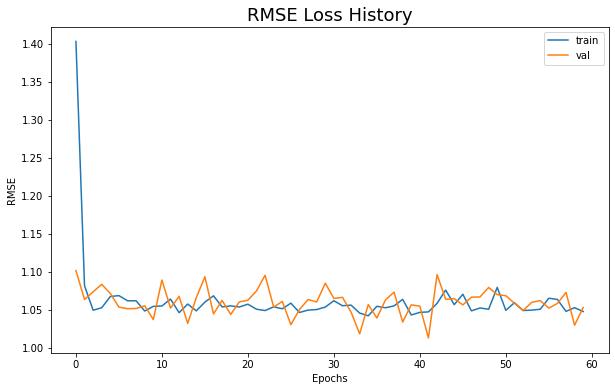

model train time: 22.578

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 1.671, val: 1.110
EPOCH 2: Avg losses: train: 1.015, val: 0.968
EPOCH 3: Avg losses: train: 0.948, val: 0.959
EPOCH 4: Avg losses: train: 0.920, val: 0.929
EPOCH 5: Avg losses: train: 0.899, val: 0.919
EPOCH 6: Avg losses: train: 0.881, val: 0.892
EPOCH 7: Avg losses: train: 0.859, val: 0.883
EPOCH 8: Avg losses: train: 0.847, val: 0.873
EPOCH 9: Avg losses: train: 0.832, val: 0.877
EPOCH 10: Avg losses: train: 0.820, val: 0.874
EPOCH 11: Avg losses: train: 0.813, val: 0.878
EPOCH 12: Avg losses: train: 0.801, val: 0.846
EPOCH 13: Avg losses: train: 0.790, val: 0.860
EPOCH 14: Avg losses: train: 0.780, val: 0.845
EPOCH 15: Avg losses: train: 0.775, val: 0.852
EPOCH 16: Avg losses: train: 0.771, val: 0.844
EPOCH 17: Avg losses: train: 0.766, val: 0.834
EPOCH 18: Avg losses: train: 0.752, val: 0.828
EPOCH 19: Avg losses: train: 0.743, val: 0.817
EPOCH 20: Avg losses: t

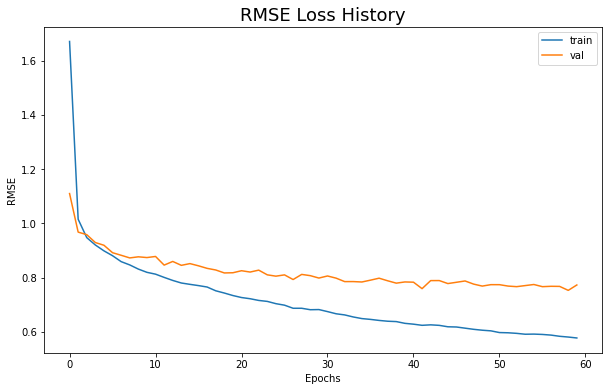

model train time: 22.428

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 1.676, val: 1.119
EPOCH 2: Avg losses: train: 1.019, val: 0.975
EPOCH 3: Avg losses: train: 0.959, val: 0.983
EPOCH 4: Avg losses: train: 0.943, val: 0.960
EPOCH 5: Avg losses: train: 0.933, val: 0.950
EPOCH 6: Avg losses: train: 0.927, val: 0.929
EPOCH 7: Avg losses: train: 0.919, val: 0.930
EPOCH 8: Avg losses: train: 0.919, val: 0.917
EPOCH 9: Avg losses: train: 0.912, val: 0.935
EPOCH 10: Avg losses: train: 0.909, val: 0.919
EPOCH 11: Avg losses: train: 0.909, val: 0.942
EPOCH 12: Avg losses: train: 0.904, val: 0.908
EPOCH 13: Avg losses: train: 0.899, val: 0.927
EPOCH 14: Avg losses: train: 0.899, val: 0.918
EPOCH 15: Avg losses: train: 0.903, val: 0.926
EPOCH 16: Avg losses: train: 0.906, val: 0.920
EPOCH 17: Avg losses: train: 0.907, val: 0.908
EPOCH 18: Avg losses: train: 0.898, val: 0.914
EPOCH 19: Avg losses: train: 0.899, val: 0.903
EPOCH 20: Avg losses: t

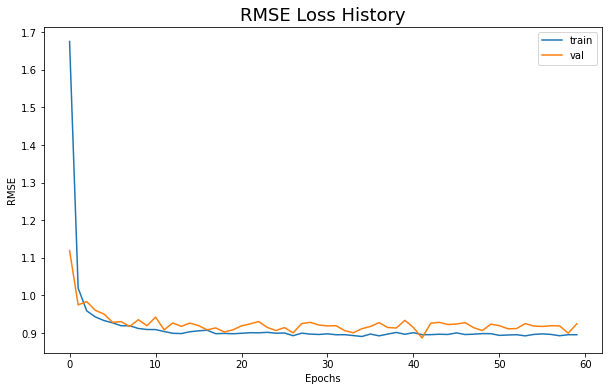

model train time: 22.648

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.001, reg: 0.005
EPOCH 1: Avg losses: train: 1.687, val: 1.128
EPOCH 2: Avg losses: train: 1.025, val: 0.985
EPOCH 3: Avg losses: train: 0.973, val: 1.004
EPOCH 4: Avg losses: train: 0.963, val: 0.986
EPOCH 5: Avg losses: train: 0.960, val: 0.979
EPOCH 6: Avg losses: train: 0.960, val: 0.960
EPOCH 7: Avg losses: train: 0.957, val: 0.961
EPOCH 8: Avg losses: train: 0.959, val: 0.952
EPOCH 9: Avg losses: train: 0.952, val: 0.969
EPOCH 10: Avg losses: train: 0.950, val: 0.952
EPOCH 11: Avg losses: train: 0.952, val: 0.980
EPOCH 12: Avg losses: train: 0.948, val: 0.946
EPOCH 13: Avg losses: train: 0.943, val: 0.966
EPOCH 14: Avg losses: train: 0.942, val: 0.955
EPOCH 15: Avg losses: train: 0.949, val: 0.964
EPOCH 16: Avg losses: train: 0.949, val: 0.959
EPOCH 17: Avg losses: train: 0.953, val: 0.949
EPOCH 18: Avg losses: train: 0.945, val: 0.952
EPOCH 19: Avg losses: train: 0.944, val: 0.947
EPOCH 20: Avg losses: t

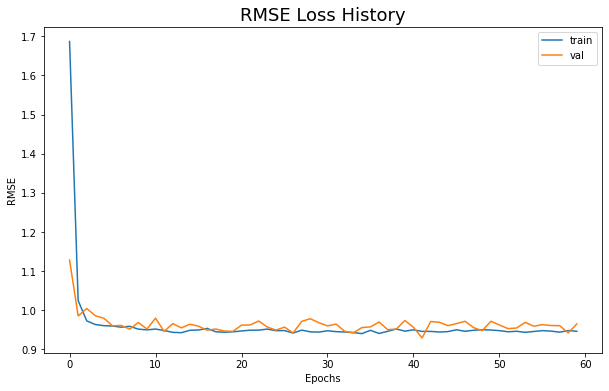

model train time: 22.529

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 1.414, val: 1.061
EPOCH 2: Avg losses: train: 1.005, val: 0.966
EPOCH 3: Avg losses: train: 0.941, val: 0.956
EPOCH 4: Avg losses: train: 0.922, val: 0.931
EPOCH 5: Avg losses: train: 0.903, val: 0.918
EPOCH 6: Avg losses: train: 0.894, val: 0.897
EPOCH 7: Avg losses: train: 0.879, val: 0.891
EPOCH 8: Avg losses: train: 0.871, val: 0.885
EPOCH 9: Avg losses: train: 0.863, val: 0.903
EPOCH 10: Avg losses: train: 0.852, val: 0.879
EPOCH 11: Avg losses: train: 0.849, val: 0.904
EPOCH 12: Avg losses: train: 0.845, val: 0.876
EPOCH 13: Avg losses: train: 0.829, val: 0.873
EPOCH 14: Avg losses: train: 0.822, val: 0.866
EPOCH 15: Avg losses: train: 0.827, val: 0.884
EPOCH 16: Avg losses: train: 0.826, val: 0.877
EPOCH 17: Avg losses: train: 0.820, val: 0.872
EPOCH 18: Avg losses: train: 0.804, val: 0.857
EPOCH 19: Avg losses: train: 0.806, val: 0.845
EPOCH 20: Avg losses: t

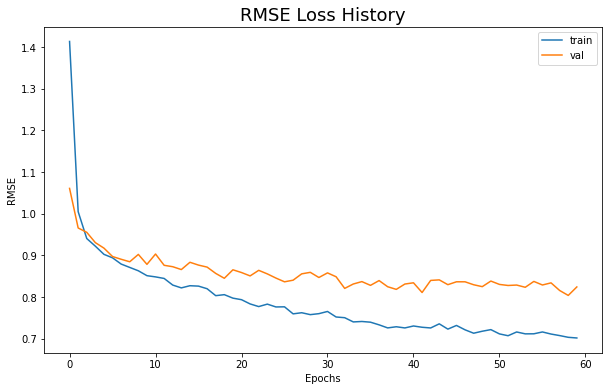

model train time: 22.632

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 1.410, val: 1.062
EPOCH 2: Avg losses: train: 1.023, val: 0.992
EPOCH 3: Avg losses: train: 0.983, val: 1.002
EPOCH 4: Avg losses: train: 0.981, val: 0.986
EPOCH 5: Avg losses: train: 0.978, val: 0.977
EPOCH 6: Avg losses: train: 0.978, val: 0.962
EPOCH 7: Avg losses: train: 0.973, val: 0.969
EPOCH 8: Avg losses: train: 0.975, val: 0.969
EPOCH 9: Avg losses: train: 0.974, val: 0.977
EPOCH 10: Avg losses: train: 0.968, val: 0.960
EPOCH 11: Avg losses: train: 0.971, val: 0.990
EPOCH 12: Avg losses: train: 0.970, val: 0.967
EPOCH 13: Avg losses: train: 0.968, val: 0.971
EPOCH 14: Avg losses: train: 0.966, val: 0.958
EPOCH 15: Avg losses: train: 0.974, val: 0.982
EPOCH 16: Avg losses: train: 0.982, val: 0.974
EPOCH 17: Avg losses: train: 0.986, val: 0.970
EPOCH 18: Avg losses: train: 0.969, val: 0.965
EPOCH 19: Avg losses: train: 0.967, val: 0.954
EPOCH 20: Avg losses: t

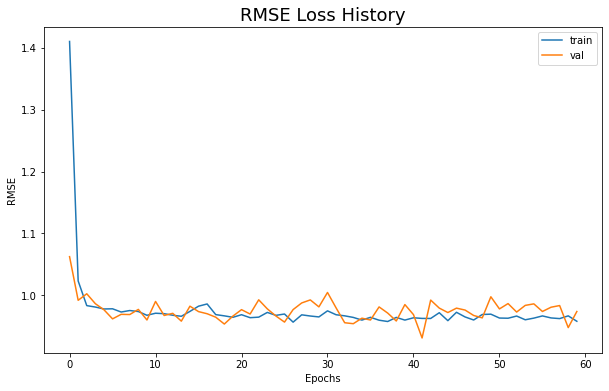

model train time: 22.659

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.003, reg: 0.005
EPOCH 1: Avg losses: train: 1.412, val: 1.073
EPOCH 2: Avg losses: train: 1.044, val: 1.012
EPOCH 3: Avg losses: train: 1.014, val: 1.035
EPOCH 4: Avg losses: train: 1.015, val: 1.023
EPOCH 5: Avg losses: train: 1.017, val: 1.017
EPOCH 6: Avg losses: train: 1.018, val: 1.003
EPOCH 7: Avg losses: train: 1.016, val: 1.011
EPOCH 8: Avg losses: train: 1.022, val: 1.025
EPOCH 9: Avg losses: train: 1.018, val: 1.020
EPOCH 10: Avg losses: train: 1.012, val: 1.004
EPOCH 11: Avg losses: train: 1.012, val: 1.035
EPOCH 12: Avg losses: train: 1.017, val: 1.012
EPOCH 13: Avg losses: train: 1.009, val: 1.012
EPOCH 14: Avg losses: train: 1.012, val: 0.998
EPOCH 15: Avg losses: train: 1.014, val: 1.014
EPOCH 16: Avg losses: train: 1.023, val: 1.031
EPOCH 17: Avg losses: train: 1.035, val: 1.016
EPOCH 18: Avg losses: train: 1.014, val: 1.023
EPOCH 19: Avg losses: train: 1.010, val: 1.002
EPOCH 20: Avg losses: t

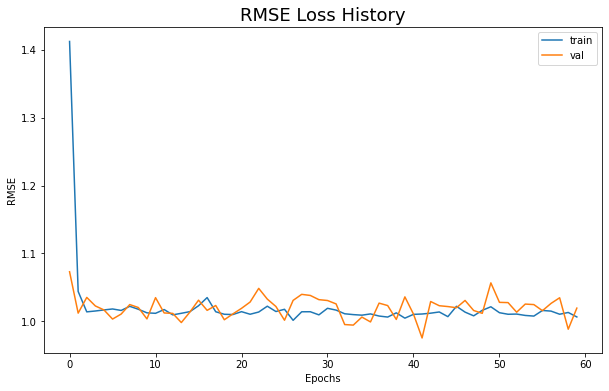

model train time: 22.595

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.001
EPOCH 1: Avg losses: train: 1.412, val: 1.061
EPOCH 2: Avg losses: train: 1.025, val: 0.970
EPOCH 3: Avg losses: train: 0.973, val: 0.981
EPOCH 4: Avg losses: train: 0.956, val: 0.955
EPOCH 5: Avg losses: train: 0.940, val: 0.947
EPOCH 6: Avg losses: train: 0.935, val: 0.927
EPOCH 7: Avg losses: train: 0.923, val: 0.923
EPOCH 8: Avg losses: train: 0.921, val: 0.923
EPOCH 9: Avg losses: train: 0.915, val: 0.936
EPOCH 10: Avg losses: train: 0.909, val: 0.920
EPOCH 11: Avg losses: train: 0.902, val: 0.938
EPOCH 12: Avg losses: train: 0.900, val: 0.928
EPOCH 13: Avg losses: train: 0.896, val: 0.920
EPOCH 14: Avg losses: train: 0.901, val: 0.906
EPOCH 15: Avg losses: train: 0.895, val: 0.922
EPOCH 16: Avg losses: train: 0.894, val: 0.918
EPOCH 17: Avg losses: train: 0.896, val: 0.912
EPOCH 18: Avg losses: train: 0.885, val: 0.905
EPOCH 19: Avg losses: train: 0.884, val: 0.886
EPOCH 20: Avg losses: t

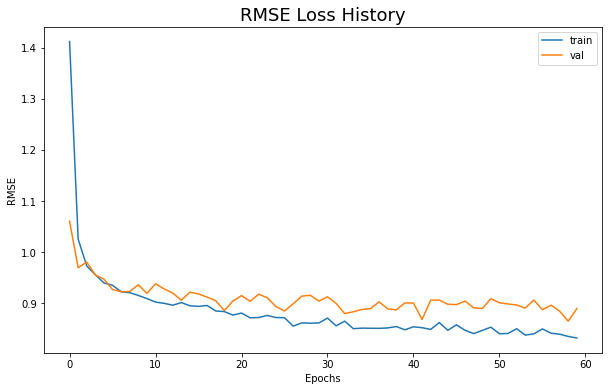

model train time: 22.630

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.003
EPOCH 1: Avg losses: train: 1.406, val: 1.060
EPOCH 2: Avg losses: train: 1.053, val: 1.015
EPOCH 3: Avg losses: train: 1.016, val: 1.031
EPOCH 4: Avg losses: train: 1.018, val: 1.033
EPOCH 5: Avg losses: train: 1.023, val: 1.026
EPOCH 6: Avg losses: train: 1.025, val: 1.007
EPOCH 7: Avg losses: train: 1.020, val: 1.010
EPOCH 8: Avg losses: train: 1.024, val: 1.016
EPOCH 9: Avg losses: train: 1.017, val: 1.021
EPOCH 10: Avg losses: train: 1.014, val: 0.999
EPOCH 11: Avg losses: train: 1.015, val: 1.045
EPOCH 12: Avg losses: train: 1.019, val: 1.012
EPOCH 13: Avg losses: train: 1.006, val: 1.022
EPOCH 14: Avg losses: train: 1.017, val: 0.997
EPOCH 15: Avg losses: train: 1.011, val: 1.017
EPOCH 16: Avg losses: train: 1.021, val: 1.048
EPOCH 17: Avg losses: train: 1.030, val: 1.016
EPOCH 18: Avg losses: train: 1.007, val: 1.011
EPOCH 19: Avg losses: train: 1.011, val: 1.008
EPOCH 20: Avg losses: t

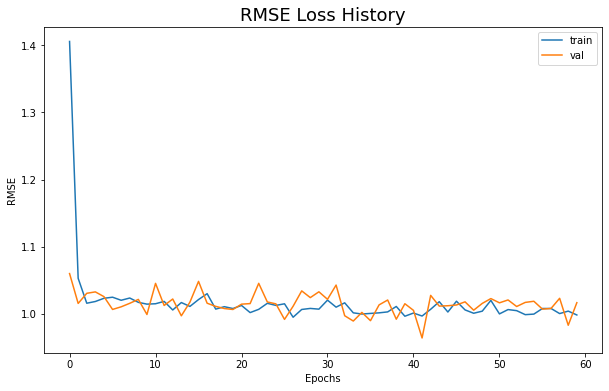

model train time: 22.824

STARTING TRAIN AutoRec with num_hidden: 500, lr: 0.005, reg: 0.005
EPOCH 1: Avg losses: train: 1.403, val: 1.102
EPOCH 2: Avg losses: train: 1.082, val: 1.064
EPOCH 3: Avg losses: train: 1.049, val: 1.074
EPOCH 4: Avg losses: train: 1.053, val: 1.084
EPOCH 5: Avg losses: train: 1.068, val: 1.071
EPOCH 6: Avg losses: train: 1.069, val: 1.054
EPOCH 7: Avg losses: train: 1.062, val: 1.051
EPOCH 8: Avg losses: train: 1.062, val: 1.052
EPOCH 9: Avg losses: train: 1.048, val: 1.055
EPOCH 10: Avg losses: train: 1.055, val: 1.037
EPOCH 11: Avg losses: train: 1.055, val: 1.089
EPOCH 12: Avg losses: train: 1.064, val: 1.052
EPOCH 13: Avg losses: train: 1.046, val: 1.068
EPOCH 14: Avg losses: train: 1.058, val: 1.032
EPOCH 15: Avg losses: train: 1.049, val: 1.066
EPOCH 16: Avg losses: train: 1.060, val: 1.094
EPOCH 17: Avg losses: train: 1.068, val: 1.045
EPOCH 18: Avg losses: train: 1.054, val: 1.062
EPOCH 19: Avg losses: train: 1.055, val: 1.044
EPOCH 20: Avg losses: t

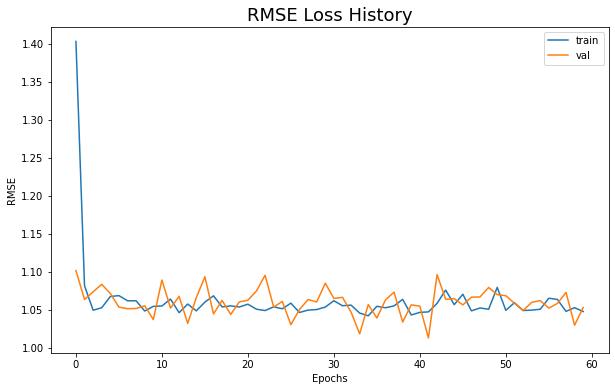

model train time: 22.665



In [9]:
import json
from time import time
from utils.plots import plot_train_history

epochs = 60
batch_size = 64

for num_hidden in [100, 200, 500]:
    for lr in [0.001, 0.003, 0.005]:
        for reg in [0.001, 0.003, 0.005]:
            print(f'STARTING TRAIN AutoRec with num_hidden: {num_hidden}, lr: {lr}, reg: {reg}')
            start_time = time()
            model_dict = {}

            num_users, num_items = train.shape

            # Init model and trainer
            model = AutoRec(num_hidden=512, num_features=num_users)
            autorec_trainer = AutoRecTrainer(train, test, model, epochs=epochs, batch_size=batch_size, lr=lr, reg=reg)

            # Train
            autorec_trainer.train_model()

            # Save parmas to model_dict
            model_dict['model_params'] = model.params()
            model_dict.update(autorec_trainer.params())
            model_dict['train_losses'] = autorec_trainer.train_losses
            model_dict['val_losses'] = autorec_trainer.val_losses

            # Save model params to json file
            file_name = f'models_params/AutoRec_{num_hidden}_{lr}_{reg}'
            with open(file_name, 'w') as f:
                json.dump(model_dict, f, indent=4)

            plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)
            print(f'model train time: {time() - start_time:.3f}\n')




In [10]:
num_users, num_items = train.shape
model = AutoRec(num_hidden=512, num_features=num_users)

In [11]:
autorec_trainer = AutoRecTrainer(train, test, model, epochs=60, batch_size=64, lr=0.001, reg=0.001)
autorec_trainer.train_model()

EPOCH 1: Avg losses: train: 1.671, val: 1.110
EPOCH 2: Avg losses: train: 1.015, val: 0.968
EPOCH 3: Avg losses: train: 0.948, val: 0.959
EPOCH 4: Avg losses: train: 0.920, val: 0.929
EPOCH 5: Avg losses: train: 0.899, val: 0.919
EPOCH 6: Avg losses: train: 0.881, val: 0.892
EPOCH 7: Avg losses: train: 0.859, val: 0.883
EPOCH 8: Avg losses: train: 0.847, val: 0.873
EPOCH 9: Avg losses: train: 0.832, val: 0.877
EPOCH 10: Avg losses: train: 0.820, val: 0.874
EPOCH 11: Avg losses: train: 0.813, val: 0.878
EPOCH 12: Avg losses: train: 0.801, val: 0.846
EPOCH 13: Avg losses: train: 0.790, val: 0.860
EPOCH 14: Avg losses: train: 0.780, val: 0.845
EPOCH 15: Avg losses: train: 0.775, val: 0.852
EPOCH 16: Avg losses: train: 0.771, val: 0.844
EPOCH 17: Avg losses: train: 0.766, val: 0.834
EPOCH 18: Avg losses: train: 0.752, val: 0.828
EPOCH 19: Avg losses: train: 0.743, val: 0.817
EPOCH 20: Avg losses: train: 0.734, val: 0.818
EPOCH 21: Avg losses: train: 0.727, val: 0.826
EPOCH 22: Avg losses: 

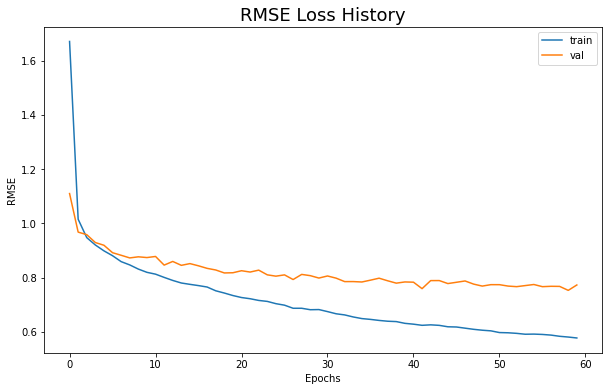

In [12]:
from utils.plots import plot_train_history
plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)